# Telecom Churn Case Study

## Problem Statement
### Business Problem Overview

The Telecommunications Industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.

For many incumbent operators, retaining high profitable customers is the number one business goal.   

There are many ways for defining churn: a)Revenue based churn b) Usage based churn.    




### Goal of the case study
This case study aims to:
- To predict customers which are at high risk of churn(using usage-based definition to define churn)
- To identify important predictor attributes which help the business understand indicators of churn. 
- To recommend strategies to manage customer churn based on observations


**The dataset contains customer-level information for a span of four consecutive months - June, July, August and September. The months are encoded as 6, 7, 8 and 9, respectively.**
<br><br/>
**The business objective is to predict the churn in the last (i.e. the ninth) month using the data (features) from the first three months. To do this task well, understanding the typical customer behaviour during churn will be helpful.**
<br><br/>

## Import the Data

In [1]:
# Importing the required libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
#To display all the Columns
pd.set_option('display.max_columns', 250)

In [4]:
# Importing the telecom_churn_data.csv file data into churn_data dataframe
churn_data = pd.read_csv("telecom_churn_data.csv")

## Inspect the Data

In [5]:
# To see the head of the dataset
churn_data.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,

In [6]:
# To see the last 5 rows of the dataframe
churn_data.tail()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
99994,7001548952,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,18.471,69.161,57.530,29.950,5.40,3.36,5.91,0.00,15.19,54.46,52.79,27.14,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,5.40,3.36,5.91,0.00,12.78,54.46,49.58,24.78,0.00,0.00,0.00,2.25,0.00,0.0,3.21,0.11,18.18,57.83,55.49,27.03,0.00,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.00,0.0,0.0,0.0,2.41,3.01,3.21,0.11,0.00,0.0,0.0,0.0,20.59,60.84,58.71,27.14,27.68,20.78,40.94,22.06,47.96,46.93,76.08,82.89,17.45,5.16,43.79,49.46,93.09,72.88,160.83,154.43,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00

In [7]:
# To check the dimensions of the dataframe
churn_data.shape

(99999, 226)

**INFERENCES:**
* **Number of columns: 226**
* **Number of rows: 99999**

In [8]:
# To see the statistical aspects of the dataframe
churn_data.describe()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.999900e+04,99999.0,98981.0,98981.0,98981.0,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.0,96140.0,94621.0,92254.0,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621

In [9]:
# To see the data type of each column
churn_data.info("all")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 226 columns):
 #    Column                    Dtype  
---   ------                    -----  
 0    mobile_number             int64  
 1    circle_id                 int64  
 2    loc_og_t2o_mou            float64
 3    std_og_t2o_mou            float64
 4    loc_ic_t2o_mou            float64
 5    last_date_of_month_6      object 
 6    last_date_of_month_7      object 
 7    last_date_of_month_8      object 
 8    last_date_of_month_9      object 
 9    arpu_6                    float64
 10   arpu_7                    float64
 11   arpu_8                    float64
 12   arpu_9                    float64
 13   onnet_mou_6               float64
 14   onnet_mou_7               float64
 15   onnet_mou_8               float64
 16   onnet_mou_9               float64
 17   offnet_mou_6              float64
 18   offnet_mou_7              float64
 19   offnet_mou_8              float64
 20   offn

**INFERENCE:** 
* **There are 12 columns with object data type.**
* **Rest of the columns are numeric (data types - float64, int64).**

In [10]:
# Storing all the column names of the churn_data DataFrame in col_list
col_list = churn_data.columns.values.tolist()
col_list

['mobile_number',
 'circle_id',
 'loc_og_t2o_mou',
 'std_og_t2o_mou',
 'loc_ic_t2o_mou',
 'last_date_of_month_6',
 'last_date_of_month_7',
 'last_date_of_month_8',
 'last_date_of_month_9',
 'arpu_6',
 'arpu_7',
 'arpu_8',
 'arpu_9',
 'onnet_mou_6',
 'onnet_mou_7',
 'onnet_mou_8',
 'onnet_mou_9',
 'offnet_mou_6',
 'offnet_mou_7',
 'offnet_mou_8',
 'offnet_mou_9',
 'roam_ic_mou_6',
 'roam_ic_mou_7',
 'roam_ic_mou_8',
 'roam_ic_mou_9',
 'roam_og_mou_6',
 'roam_og_mou_7',
 'roam_og_mou_8',
 'roam_og_mou_9',
 'loc_og_t2t_mou_6',
 'loc_og_t2t_mou_7',
 'loc_og_t2t_mou_8',
 'loc_og_t2t_mou_9',
 'loc_og_t2m_mou_6',
 'loc_og_t2m_mou_7',
 'loc_og_t2m_mou_8',
 'loc_og_t2m_mou_9',
 'loc_og_t2f_mou_6',
 'loc_og_t2f_mou_7',
 'loc_og_t2f_mou_8',
 'loc_og_t2f_mou_9',
 'loc_og_t2c_mou_6',
 'loc_og_t2c_mou_7',
 'loc_og_t2c_mou_8',
 'loc_og_t2c_mou_9',
 'loc_og_mou_6',
 'loc_og_mou_7',
 'loc_og_mou_8',
 'loc_og_mou_9',
 'std_og_t2t_mou_6',
 'std_og_t2t_mou_7',
 'std_og_t2t_mou_8',
 'std_og_t2t_mou_9',
 's

## Data Cleaning

In [11]:
# To check percentage of null values in top 60 columns
((churn_data.isnull().sum()/len(churn_data.index))*100).round(2).sort_values(ascending=False).head(60)

arpu_3g_6                   74.85
night_pck_user_6            74.85
total_rech_data_6           74.85
arpu_2g_6                   74.85
max_rech_data_6             74.85
fb_user_6                   74.85
av_rech_amt_data_6          74.85
date_of_last_rech_data_6    74.85
count_rech_2g_6             74.85
count_rech_3g_6             74.85
date_of_last_rech_data_7    74.43
total_rech_data_7           74.43
fb_user_7                   74.43
max_rech_data_7             74.43
night_pck_user_7            74.43
count_rech_2g_7             74.43
av_rech_amt_data_7          74.43
arpu_2g_7                   74.43
count_rech_3g_7             74.43
arpu_3g_7                   74.43
total_rech_data_9           74.08
count_rech_3g_9             74.08
fb_user_9                   74.08
max_rech_data_9             74.08
arpu_3g_9                   74.08
date_of_last_rech_data_9    74.08
night_pck_user_9            74.08
arpu_2g_9                   74.08
count_rech_2g_9             74.08
av_rech_amt_da

### Filter High-Value Customers
* **We need to predict churn only for the high-value customers.**
* **As the volume of data is huge, it is better to first filter out the high-value customers and then perform other operations on the data.**
* **High-value customers are those who have recharged with an amount more than or equal to X, where X is the 70th percentile of the average recharge amount in the first two months (the good phase).**

In [12]:
# Putting all the recharge related columns in recharge_cols.
recharge_cols = ['total_rech_num_6', 'total_rech_num_7', 'total_rech_num_8', 'total_rech_num_9',
                 'total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_8', 'total_rech_amt_9',
                 'total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8', 'total_rech_data_9',
                 'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8', 'max_rech_data_9',
                 'count_rech_2g_6', 'count_rech_2g_7', 'count_rech_2g_8', 'count_rech_2g_9',
                 'count_rech_3g_6', 'count_rech_3g_7', 'count_rech_3g_8', 'count_rech_3g_9',
                 'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8', 'av_rech_amt_data_9',]

In [13]:
churn_data[recharge_cols].head(10)

,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9
0,4,3,2,6,362,252,252,0,1.0,1.0,1.0,NaN,252.0,252.0,252.0,NaN,0.0,0.0,0.0,NaN,1.0,1.0,1.0,NaN,252.0,252.0,252.0,NaN
1,4,9,11,5,74,384,283,121,NaN,1.0,2.0,NaN,NaN,154.0,25.0,NaN,NaN,1.0,2.0,NaN,NaN,0.0,0.0,NaN,NaN,154.0,50.0,NaN
2,5,4,2,7,168,315,116,358,NaN,NaN,NaN,1.0,NaN,NaN,NaN,46.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,46.0
3,10,11,18,14,230,310,601,410,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,6,3,4,196,350,287,200,1.0,NaN,NaN,NaN,56.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,56.0,NaN,NaN,NaN
5,2,2,3,3,120,0,130,130,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,15,10,11,7,499,222,294,141,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,5,5,7,3,1580,790,3638,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,19,21,14,15,437,601,120,186,NaN,2.0,3.0,NaN,NaN,154.0,23.0,NaN,NaN,2.0,3.0,NaN,NaN,0.0,0.0,NaN,NaN,177.0,69.0,NaN
9,4,2,5,3,220,195,210,180,NaN,1.0,NaN,NaN,NaN,154.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,154.0,NaN,NaN


In [14]:
# To check percentage of null values in recharge related columns
((churn_data[recharge_cols].isnull().sum()/len(churn_data.index))*100).round(2).sort_values(ascending=False)

total_rech_data_6     74.85
count_rech_2g_6       74.85
av_rech_amt_data_6    74.85
max_rech_data_6       74.85
count_rech_3g_6       74.85
total_rech_data_7     74.43
max_rech_data_7       74.43
count_rech_2g_7       74.43
count_rech_3g_7       74.43
av_rech_amt_data_7    74.43
total_rech_data_9     74.08
count_rech_3g_9       74.08
count_rech_2g_9       74.08
max_rech_data_9       74.08
av_rech_amt_data_9    74.08
count_rech_2g_8       73.66
count_rech_3g_8       73.66
av_rech_amt_data_8    73.66
max_rech_data_8       73.66
total_rech_data_8     73.66
total_rech_num_7       0.00
total_rech_amt_9       0.00
total_rech_amt_8       0.00
total_rech_amt_7       0.00
total_rech_amt_6       0.00
total_rech_num_9       0.00
total_rech_num_8       0.00
total_rech_num_6       0.00
dtype: float64

In [15]:
# Putting all the recharge related columns (that need imputation) in impute_recharge_cols.
impute_recharge_cols = ['total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8', 'total_rech_data_9',
                 'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8', 'max_rech_data_9',
                 'count_rech_2g_6', 'count_rech_2g_7', 'count_rech_2g_8', 'count_rech_2g_9',
                 'count_rech_3g_6', 'count_rech_3g_7', 'count_rech_3g_8', 'count_rech_3g_9',
                 'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8', 'av_rech_amt_data_9',]

In [16]:
# Imputing missing values in the required recharge related columns with '0'.
churn_data[impute_recharge_cols] = churn_data[impute_recharge_cols].fillna(0, axis=1)

In [17]:
# Again check percentage of null values in recharge related columns
((churn_data[recharge_cols].isnull().sum()/len(churn_data.index))*100).round(2)

total_rech_num_6      0.0
total_rech_num_7      0.0
total_rech_num_8      0.0
total_rech_num_9      0.0
total_rech_amt_6      0.0
total_rech_amt_7      0.0
total_rech_amt_8      0.0
total_rech_amt_9      0.0
total_rech_data_6     0.0
total_rech_data_7     0.0
total_rech_data_8     0.0
total_rech_data_9     0.0
max_rech_data_6       0.0
max_rech_data_7       0.0
max_rech_data_8       0.0
max_rech_data_9       0.0
count_rech_2g_6       0.0
count_rech_2g_7       0.0
count_rech_2g_8       0.0
count_rech_2g_9       0.0
count_rech_3g_6       0.0
count_rech_3g_7       0.0
count_rech_3g_8       0.0
count_rech_3g_9       0.0
av_rech_amt_data_6    0.0
av_rech_amt_data_7    0.0
av_rech_amt_data_8    0.0
av_rech_amt_data_9    0.0
dtype: float64

In [18]:
# Creating new columns for 6th,7th and 8th month to store the total amount spent on data recharge. 
churn_data['total_data_rech_amt_6']=churn_data['total_rech_data_6']*churn_data['av_rech_amt_data_6']
churn_data['total_data_rech_amt_7']=churn_data['total_rech_data_7']*churn_data['av_rech_amt_data_7']
churn_data['total_data_rech_amt_8']=churn_data['total_rech_data_8']*churn_data['av_rech_amt_data_8']

In [19]:
# Finally, creating new columns for 6th, 7th and 8th month to store the total recharge amount spent on calls + data.
churn_data['total_monthly_rech_6']=churn_data['total_rech_amt_6']+churn_data['total_data_rech_amt_6']
churn_data['total_monthly_rech_7']=churn_data['total_rech_amt_7']+churn_data['total_data_rech_amt_7']
churn_data['total_monthly_rech_8']=churn_data['total_rech_amt_8']+churn_data['total_data_rech_amt_8']

In [20]:
# Filtering high-value customers based on the average recharge amount in the first two months - 6th and 7th month (i.e. the good phase).
high_value_cus=churn_data[churn_data[['total_monthly_rech_6','total_monthly_rech_7']].mean(axis=1)>=churn_data[['total_monthly_rech_6','total_monthly_rech_7']].mean(axis=1).quantile(0.7)]

In [21]:
# To see the first 5 rows of this new dataset
high_value_cus.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_data_rech_amt_6,total_data_rech_amt_7,total_data_rech_amt_8,total_monthly_rech_6,total_monthly_rech_7,total_monthly_rech_8
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0

In [22]:
# Checking dimensions of high_value_cus dataset
high_value_cus.shape

(30001, 232)

**INFERENCE: We got 30001 high-value customers.**

In [23]:
# To see the data type of each column
high_value_cus.info("all")

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30001 entries, 0 to 99997
Data columns (total 232 columns):
 #    Column                    Dtype  
---   ------                    -----  
 0    mobile_number             int64  
 1    circle_id                 int64  
 2    loc_og_t2o_mou            float64
 3    std_og_t2o_mou            float64
 4    loc_ic_t2o_mou            float64
 5    last_date_of_month_6      object 
 6    last_date_of_month_7      object 
 7    last_date_of_month_8      object 
 8    last_date_of_month_9      object 
 9    arpu_6                    float64
 10   arpu_7                    float64
 11   arpu_8                    float64
 12   arpu_9                    float64
 13   onnet_mou_6               float64
 14   onnet_mou_7               float64
 15   onnet_mou_8               float64
 16   onnet_mou_9               float64
 17   offnet_mou_6              float64
 18   offnet_mou_7              float64
 19   offnet_mou_8              float64
 20   offn

### Tag Churners
* **Lets tag the churned customers (churn=1, else 0) based on the fourth month as follows:**
    * **Those who have not made any calls (either incoming or outgoing) AND** 
    * **have not used mobile internet even once in the churn phase.**
* **The attributes you need to use to tag churners are:**
    * **total_ic_mou_9**
    * **total_og_mou_9**
    * **vol_2g_mb_9**
    * **vol_3g_mb_9**

In [24]:
# Storing all attributes mentioned above in attr_cols
attr_cols=['total_ic_mou_9','total_og_mou_9','vol_2g_mb_9','vol_3g_mb_9']

In [25]:
# Tagging churners as 1 and Non-churners as 0. Storing the value in new column 'churn'.
high_value_cus['churn']=high_value_cus[attr_cols].apply(lambda x: 1 if ((x['total_ic_mou_9']==0.00) & (x['total_og_mou_9']==0.00) & (x['vol_2g_mb_9']==0.0) & (x['vol_3g_mb_9']==0.0)) else 0, axis=1)

In [26]:
high_value_cus[['total_ic_mou_9','total_og_mou_9','vol_2g_mb_9','vol_3g_mb_9','churn']].head(10)

,total_ic_mou_9,total_og_mou_9,vol_2g_mb_9,vol_3g_mb_9,churn
0,0.00,0.00,0.00,0.00,1
7,0.00,0.00,0.00,0.00,1
8,34.91,142.18,0.00,0.00,0
21,252.61,1031.53,0.00,0.00,0
23,127.48,127.63,13.93,314.74,0
33,114.16,1.70,30.92,5588.11,0
38,114.09,708.04,0.00,0.00,0
41,165.84,89.13,0.00,0.00,0
48,894.81,2319.01,0.00,0.00,0
53,680.61,503.06,0.82,0.00,0


In [27]:
# Checking dimensions of high_value_cus dataset
high_value_cus.shape

(30001, 233)

### Remove Attributes of the Churn Phase
* **After tagging churners, remove all the attributes corresponding to the churn phase.**
* **These attributes are the attributes having ‘ _9’, etc. in their names.**

In [28]:
import re
# Filtering all columns having column name ending with '_9'
remove_attr_cols=high_value_cus.filter(regex=('_9')).columns
remove_attr_cols

Index(['last_date_of_month_9', 'arpu_9', 'onnet_mou_9', 'offnet_mou_9',
       'roam_ic_mou_9', 'roam_og_mou_9', 'loc_og_t2t_mou_9',
       'loc_og_t2m_mou_9', 'loc_og_t2f_mou_9', 'loc_og_t2c_mou_9',
       'loc_og_mou_9', 'std_og_t2t_mou_9', 'std_og_t2m_mou_9',
       'std_og_t2f_mou_9', 'std_og_t2c_mou_9', 'std_og_mou_9', 'isd_og_mou_9',
       'spl_og_mou_9', 'og_others_9', 'total_og_mou_9', 'loc_ic_t2t_mou_9',
       'loc_ic_t2m_mou_9', 'loc_ic_t2f_mou_9', 'loc_ic_mou_9',
       'std_ic_t2t_mou_9', 'std_ic_t2m_mou_9', 'std_ic_t2f_mou_9',
       'std_ic_t2o_mou_9', 'std_ic_mou_9', 'total_ic_mou_9', 'spl_ic_mou_9',
       'isd_ic_mou_9', 'ic_others_9', 'total_rech_num_9', 'total_rech_amt_9',
       'max_rech_amt_9', 'date_of_last_rech_9', 'last_day_rch_amt_9',
       'date_of_last_rech_data_9', 'total_rech_data_9', 'max_rech_data_9',
       'count_rech_2g_9', 'count_rech_3g_9', 'av_rech_amt_data_9',
       'vol_2g_mb_9', 'vol_3g_mb_9', 'arpu_3g_9', 'arpu_2g_9',
       'night_pck_user

In [29]:
# Dropping these columns
high_value_cus.drop(remove_attr_cols,axis=1,inplace=True)

In [30]:
# Dropping 'sep_vbc_3g' column as well
high_value_cus.drop('sep_vbc_3g',axis=1,inplace=True)

In [31]:
# Checking dimensions of high_value_cus dataset
high_value_cus.shape

(30001, 178)

### Drop Columns having all Unique Values

In [32]:
# To find number of unique values in each column. Display bottom 60.
high_value_cus.nunique().sort_values().tail(60)

std_ic_t2m_mou_8     6117
arpu_3g_7            6213
arpu_3g_6            6330
std_ic_t2m_mou_6     6356
std_ic_t2m_mou_7     6455
std_ic_mou_8         7690
std_ic_mou_6         8022
std_ic_mou_7         8139
jun_vbc_3g           9285
loc_ic_t2t_mou_8     9363
loc_ic_t2t_mou_6     9506
loc_ic_t2t_mou_7     9658
aug_vbc_3g           9840
jul_vbc_3g          10007
loc_og_t2t_mou_8    10063
vol_3g_mb_8         10115
vol_2g_mb_8         10205
std_og_t2t_mou_8    10251
vol_3g_mb_6         10262
loc_og_t2t_mou_7    10394
loc_og_t2t_mou_6    10420
vol_3g_mb_7         10839
std_og_t2t_mou_6    11102
vol_2g_mb_7         11228
std_og_t2t_mou_7    11254
vol_2g_mb_6         11311
std_og_t2m_mou_8    11803
std_og_t2m_mou_6    12875
std_og_t2m_mou_7    12888
std_og_mou_8        14719
loc_ic_t2m_mou_8    15122
loc_og_t2m_mou_8    15130
loc_ic_t2m_mou_6    15461
loc_ic_t2m_mou_7    15547
loc_og_t2m_mou_6    15625
loc_og_t2m_mou_7    15674
onnet_mou_8         15872
std_og_mou_6        15922
std_og_mou_7

**INFERENCES: The 'mobile_number' column can be dropped as it has all unique values and it is not useful in further analysis.**

In [33]:
# Dropping 'mobile_number' column from 'high_value_cus' dataset
high_value_cus.drop(['mobile_number'],axis=1,inplace=True)

In [34]:
high_value_cus.shape

(30001, 177)

In [35]:
# To find number of unique values in each column. Display top 60.
high_value_cus.nunique().sort_values().head(60)

circle_id                     1
std_og_t2c_mou_8              1
std_ic_t2o_mou_6              1
std_ic_t2o_mou_7              1
std_ic_t2o_mou_8              1
std_og_t2c_mou_7              1
std_og_t2c_mou_6              1
last_date_of_month_7          1
last_date_of_month_6          1
loc_ic_t2o_mou                1
std_og_t2o_mou                1
loc_og_t2o_mou                1
last_date_of_month_8          1
fb_user_8                     2
fb_user_7                     2
night_pck_user_8              2
night_pck_user_7              2
night_pck_user_6              2
fb_user_6                     2
churn                         2
monthly_2g_6                  5
monthly_2g_7                  6
monthly_2g_8                  6
monthly_3g_6                 12
monthly_3g_8                 12
monthly_3g_7                 15
count_rech_3g_6              25
sachet_3g_6                  25
sachet_3g_7                  27
count_rech_3g_7              28
count_rech_3g_8              29
sachet_3

In [36]:
# We can drop the columns having only one unique value.
high_value_cus.drop(['circle_id','loc_og_t2o_mou','std_ic_t2o_mou_7','std_ic_t2o_mou_6','loc_ic_t2o_mou','std_og_t2o_mou',
                     'std_og_t2c_mou_8','std_og_t2c_mou_7','std_og_t2c_mou_6','std_ic_t2o_mou_8',
                     'last_date_of_month_6','last_date_of_month_7','last_date_of_month_8'], axis=1, inplace=True)

In [37]:
high_value_cus.shape

(30001, 164)

In [38]:
# Validating whether the columns having only one unique value, are dropped. 
high_value_cus.nunique().sort_values().head(10)

churn               2
night_pck_user_7    2
night_pck_user_8    2
night_pck_user_6    2
fb_user_6           2
fb_user_7           2
fb_user_8           2
monthly_2g_6        5
monthly_2g_8        6
monthly_2g_7        6
dtype: int64

**INFERENCE: Columns having only one unique value are dropped.**

### Handle Missing Values in Categorical Columns

In [39]:
# Creating a list of categorical columns
cat_cols=['night_pck_user_6','night_pck_user_7','night_pck_user_8',
             'fb_user_6','fb_user_7','fb_user_8']

In [40]:
# To check percentage of missing values in each categorical column mentioned above
((high_value_cus[cat_cols].isnull().sum()/len(high_value_cus.index))*100).round(2).sort_values(ascending=False)

night_pck_user_8    46.83
fb_user_8           46.83
night_pck_user_6    44.15
fb_user_6           44.15
night_pck_user_7    43.15
fb_user_7           43.15
dtype: float64

**INFERENCE: The above mentioned columns have high percentage of missing values and these columns do not seem to give any information. Therefore, these can be dropped.**

In [41]:
# Dropping the categorical columns 
high_value_cus.drop(cat_cols, axis=1, inplace=True)

### Handle the 'Date of Last Recharge' related Columns

In [42]:
# Filtering all date columns with column name having 'date' in it.
date_attr_cols=high_value_cus.filter(regex=('date')).columns
date_attr_cols

Index(['date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8',
       'date_of_last_rech_data_6', 'date_of_last_rech_data_7',
       'date_of_last_rech_data_8'],
      dtype='object')

In [43]:
high_value_cus[date_attr_cols].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30001 entries, 0 to 99997
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   date_of_last_rech_6       29928 non-null  object
 1   date_of_last_rech_7       29903 non-null  object
 2   date_of_last_rech_8       29418 non-null  object
 3   date_of_last_rech_data_6  16756 non-null  object
 4   date_of_last_rech_data_7  17057 non-null  object
 5   date_of_last_rech_data_8  15953 non-null  object
dtypes: object(6)
memory usage: 1.6+ MB


**INFERENCE: All the date columns have some missing values.**

In [44]:
# To check percentage of missing values in each date attribute column
((high_value_cus[date_attr_cols].isnull().sum()/len(high_value_cus.index))*100).round(2).sort_values(ascending=False)

date_of_last_rech_data_8    46.83
date_of_last_rech_data_6    44.15
date_of_last_rech_data_7    43.15
date_of_last_rech_8          1.94
date_of_last_rech_7          0.33
date_of_last_rech_6          0.24
dtype: float64

In [45]:
# Displaying some of the month 6 columns
high_value_cus[['date_of_last_rech_data_6','total_rech_data_6','max_rech_data_6','total_rech_amt_6','date_of_last_rech_6']].head(10)

,date_of_last_rech_data_6,total_rech_data_6,max_rech_data_6,total_rech_amt_6,date_of_last_rech_6
0,6/21/2014,1.0,252.0,362,6/21/2014
7,NaN,0.0,0.0,1580,6/27/2014
8,NaN,0.0,0.0,437,6/25/2014
21,NaN,0.0,0.0,600,6/30/2014
23,NaN,0.0,0.0,0,6/18/2014
33,6/30/2014,5.0,252.0,1058,6/30/2014
38,NaN,0.0,0.0,420,6/30/2014
41,NaN,0.0,0.0,496,6/24/2014
48,NaN,0.0,0.0,2317,6/29/2014
53,6/29/2014,4.0,23.0,1159,6/29/2014


**INFERENCES:** 
* **The date_of_last_rech_data column for each of the months 6,7 and 8 do not give any additional information as the columns total_rech_data and max_rech_data for each month are enough to see if any recharge was done in the respective month. The missing value percentage is also high for these date columns. Therefore, the date_of_last_rech_data_ columns can be dropped.**
* **Similarly, date_of_last_rech_ column for each of the months 6,7 and 8 can also be dropped.**

In [46]:
# Dropping the date_of_last_rech_data_ column and date_of_last_rech_ column for each of the months 6,7 and 8 
high_value_cus.drop(date_attr_cols, axis=1, inplace=True)

In [47]:
high_value_cus.shape

(30001, 152)

### Handle the 'count_rech' columns for 6th, 7th and 8th Month

In [48]:
# Filtering all count columns with column name having 'count' in it.
count_attr_cols=high_value_cus.filter(regex=('count')).columns
count_attr_cols

Index(['count_rech_2g_6', 'count_rech_2g_7', 'count_rech_2g_8',
       'count_rech_3g_6', 'count_rech_3g_7', 'count_rech_3g_8'],
      dtype='object')

In [49]:
# Checking the Month 6 related columns values
high_value_cus[['count_rech_2g_6','count_rech_3g_6','total_rech_data_6']].head(10)

,count_rech_2g_6,count_rech_3g_6,total_rech_data_6
0,0.0,1.0,1.0
7,0.0,0.0,0.0
8,0.0,0.0,0.0
21,0.0,0.0,0.0
23,0.0,0.0,0.0
33,0.0,5.0,5.0
38,0.0,0.0,0.0
41,0.0,0.0,0.0
48,0.0,0.0,0.0
53,4.0,0.0,4.0


**INFERENCE: As the values in 'total_rech_data_6' column is the sum of values in 'count_rech_2g_6' and 'count_rech_3g_6' columns. This leads to multicollinearity issue. Therefore, all the count_rech_2g_ and count_rech_3g_ column names present in count_attr_cols, can be dropped from 'high_value_cus' dataset.**

In [50]:
# Dropping all the count_rech_2g_ and count_rech_3g_ columns for each of the months 6,7 and 8 
high_value_cus.drop(count_attr_cols, axis=1, inplace=True)

In [51]:
high_value_cus.shape

(30001, 146)

### Handle the ARPU columns

In [52]:
# Filtering all arpu columns with column name having 'arpu' in it.
arpu_attr_cols=high_value_cus.filter(regex=('arpu')).columns
arpu_attr_cols

Index(['arpu_6', 'arpu_7', 'arpu_8', 'arpu_3g_6', 'arpu_3g_7', 'arpu_3g_8',
       'arpu_2g_6', 'arpu_2g_7', 'arpu_2g_8'],
      dtype='object')

In [53]:
# To check percentage of missing values in each arpu attribute column
((high_value_cus[arpu_attr_cols].isnull().sum()/len(high_value_cus.index))*100).round(2).sort_values(ascending=False)

arpu_3g_8    46.83
arpu_2g_8    46.83
arpu_3g_6    44.15
arpu_2g_6    44.15
arpu_3g_7    43.15
arpu_2g_7    43.15
arpu_6        0.00
arpu_7        0.00
arpu_8        0.00
dtype: float64

In [54]:
# Dropping the arpu columns having high percentage of missing values
high_value_cus.drop(['arpu_3g_6', 'arpu_3g_7', 'arpu_3g_8',
                     'arpu_2g_6', 'arpu_2g_7', 'arpu_2g_8'], axis=1, inplace=True)

In [55]:
high_value_cus.shape

(30001, 140)

### Drop Columns already used to Calculate Total Monthly Recharge Amount

In [56]:
# Dropping some columns which were used to calculate 'total_monthly_rech_6', 'total_monthly_rech_7' and 'total_monthly_rech_8' previously.
high_value_cus.drop(['total_rech_data_6','total_rech_data_7','total_rech_data_8',
                     'av_rech_amt_data_6','av_rech_amt_data_7','av_rech_amt_data_8',
                     'total_rech_amt_6','total_rech_amt_7','total_rech_amt_8',
                     'total_data_rech_amt_6','total_data_rech_amt_7','total_data_rech_amt_8'], axis=1, inplace=True)

In [57]:
high_value_cus.shape

(30001, 128)

### Handle Remaining Columns having Missing Values

In [58]:
# Checking the data types of all the columns
high_value_cus.info('all')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30001 entries, 0 to 99997
Data columns (total 128 columns):
 #    Column                Dtype  
---   ------                -----  
 0    arpu_6                float64
 1    arpu_7                float64
 2    arpu_8                float64
 3    onnet_mou_6           float64
 4    onnet_mou_7           float64
 5    onnet_mou_8           float64
 6    offnet_mou_6          float64
 7    offnet_mou_7          float64
 8    offnet_mou_8          float64
 9    roam_ic_mou_6         float64
 10   roam_ic_mou_7         float64
 11   roam_ic_mou_8         float64
 12   roam_og_mou_6         float64
 13   roam_og_mou_7         float64
 14   roam_og_mou_8         float64
 15   loc_og_t2t_mou_6      float64
 16   loc_og_t2t_mou_7      float64
 17   loc_og_t2t_mou_8      float64
 18   loc_og_t2m_mou_6      float64
 19   loc_og_t2m_mou_7      float64
 20   loc_og_t2m_mou_8      float64
 21   loc_og_t2f_mou_6      float64
 22   loc_og_t2f_mou_7    

In [59]:
# Checking the percentage of missing values in all the columns. Displaying top 60.
((high_value_cus.isnull().sum()/len(high_value_cus.index))*100).round(2).sort_values(ascending=False).head(60)

isd_og_mou_8        3.91
std_ic_t2m_mou_8    3.91
std_ic_t2f_mou_8    3.91
std_og_t2f_mou_8    3.91
std_og_t2t_mou_8    3.91
loc_ic_t2f_mou_8    3.91
loc_og_mou_8        3.91
std_ic_mou_8        3.91
loc_og_t2c_mou_8    3.91
std_og_mou_8        3.91
loc_og_t2f_mou_8    3.91
loc_ic_mou_8        3.91
loc_og_t2m_mou_8    3.91
spl_ic_mou_8        3.91
loc_og_t2t_mou_8    3.91
std_og_t2m_mou_8    3.91
offnet_mou_8        3.91
og_others_8         3.91
ic_others_8         3.91
loc_ic_t2m_mou_8    3.91
spl_og_mou_8        3.91
std_ic_t2t_mou_8    3.91
roam_ic_mou_8       3.91
isd_ic_mou_8        3.91
onnet_mou_8         3.91
roam_og_mou_8       3.91
loc_ic_t2t_mou_8    3.91
std_ic_t2m_mou_6    1.82
std_og_mou_6        1.82
spl_og_mou_6        1.82
loc_ic_t2m_mou_6    1.82
og_others_6         1.82
isd_og_mou_6        1.82
std_ic_t2f_mou_6    1.82
std_og_t2f_mou_6    1.82
loc_ic_mou_6        1.82
loc_og_mou_6        1.82
std_ic_mou_6        1.82
loc_og_t2t_mou_6    1.82
onnet_mou_6         1.82


**INFERENCE: As the percentage of missing values is very less in remaining columns, we can impute it with '0'.**

In [60]:
# Storing all the column names of the high_value_cus DataFrame in num_cols
num_cols = high_value_cus.columns.values.tolist()

In [61]:
high_value_cus[num_cols] = high_value_cus[num_cols].fillna(0)

In [62]:
# Again checking the percentage of missing values in all the columns.
((high_value_cus.isnull().sum()/len(high_value_cus.index))*100).round(2).sort_values(ascending=False)

arpu_6              0.0
arpu_7              0.0
max_rech_amt_7      0.0
max_rech_amt_6      0.0
total_rech_num_8    0.0
                   ... 
std_og_t2f_mou_7    0.0
std_og_t2f_mou_6    0.0
std_og_t2m_mou_8    0.0
std_og_t2m_mou_7    0.0
churn               0.0
Length: 128, dtype: float64

In [63]:
high_value_cus.shape

(30001, 128)

In [64]:
high_value_cus.info('all')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30001 entries, 0 to 99997
Data columns (total 128 columns):
 #    Column                Dtype  
---   ------                -----  
 0    arpu_6                float64
 1    arpu_7                float64
 2    arpu_8                float64
 3    onnet_mou_6           float64
 4    onnet_mou_7           float64
 5    onnet_mou_8           float64
 6    offnet_mou_6          float64
 7    offnet_mou_7          float64
 8    offnet_mou_8          float64
 9    roam_ic_mou_6         float64
 10   roam_ic_mou_7         float64
 11   roam_ic_mou_8         float64
 12   roam_og_mou_6         float64
 13   roam_og_mou_7         float64
 14   roam_og_mou_8         float64
 15   loc_og_t2t_mou_6      float64
 16   loc_og_t2t_mou_7      float64
 17   loc_og_t2t_mou_8      float64
 18   loc_og_t2m_mou_6      float64
 19   loc_og_t2m_mou_7      float64
 20   loc_og_t2m_mou_8      float64
 21   loc_og_t2f_mou_6      float64
 22   loc_og_t2f_mou_7    

### Check Multicollinearity

In [65]:
# To check correlation between variables and display with correlation > 0.849
telecom_correlation = high_value_cus.corr().abs().unstack().sort_values(kind='quicksort').dropna()
telecom_correlation = telecom_correlation[telecom_correlation != 1.0]
telecom_correlation = telecom_correlation[(telecom_correlation > 0.849)].sort_values(ascending=False)

In [66]:
telecom_correlation

isd_og_mou_7      isd_og_mou_8        0.943120
isd_og_mou_8      isd_og_mou_7        0.943120
isd_og_mou_6      isd_og_mou_8        0.918187
isd_og_mou_8      isd_og_mou_6        0.918187
isd_og_mou_6      isd_og_mou_7        0.915247
isd_og_mou_7      isd_og_mou_6        0.915247
loc_ic_mou_6      total_ic_mou_6      0.896472
total_ic_mou_6    loc_ic_mou_6        0.896472
total_ic_mou_8    loc_ic_mou_8        0.896211
loc_ic_mou_8      total_ic_mou_8      0.896211
loc_ic_mou_7      total_ic_mou_7      0.884396
total_ic_mou_7    loc_ic_mou_7        0.884396
onnet_mou_8       std_og_t2t_mou_8    0.860668
std_og_t2t_mou_8  onnet_mou_8         0.860668
std_og_t2t_mou_7  onnet_mou_7         0.860335
onnet_mou_7       std_og_t2t_mou_7    0.860335
onnet_mou_6       std_og_t2t_mou_6    0.859409
std_og_t2t_mou_6  onnet_mou_6         0.859409
std_og_t2m_mou_7  offnet_mou_7        0.854595
offnet_mou_7      std_og_t2m_mou_7    0.854595
total_og_mou_8    std_og_mou_8        0.851307
std_og_mou_8 

In [67]:
# Dropping the below mentioned columns as these are highly correlated with some other columns.
drop_cols_1=['isd_og_mou_7','isd_og_mou_8','total_ic_mou_6','total_ic_mou_8','total_ic_mou_7',
           'std_og_t2t_mou_8','std_og_t2t_mou_7','std_og_t2t_mou_6',
           'std_og_t2m_mou_7','std_og_t2m_mou_8','total_og_mou_7','total_og_mou_8']

In [68]:
high_value_cus.drop(drop_cols_1, axis=1, inplace=True)

In [69]:
high_value_cus.info('all')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30001 entries, 0 to 99997
Data columns (total 116 columns):
 #    Column                Dtype  
---   ------                -----  
 0    arpu_6                float64
 1    arpu_7                float64
 2    arpu_8                float64
 3    onnet_mou_6           float64
 4    onnet_mou_7           float64
 5    onnet_mou_8           float64
 6    offnet_mou_6          float64
 7    offnet_mou_7          float64
 8    offnet_mou_8          float64
 9    roam_ic_mou_6         float64
 10   roam_ic_mou_7         float64
 11   roam_ic_mou_8         float64
 12   roam_og_mou_6         float64
 13   roam_og_mou_7         float64
 14   roam_og_mou_8         float64
 15   loc_og_t2t_mou_6      float64
 16   loc_og_t2t_mou_7      float64
 17   loc_og_t2t_mou_8      float64
 18   loc_og_t2m_mou_6      float64
 19   loc_og_t2m_mou_7      float64
 20   loc_og_t2m_mou_8      float64
 21   loc_og_t2f_mou_6      float64
 22   loc_og_t2f_mou_7    

In [70]:
# Filtering all isd columns with column name having 'loc' in it.
loc_attr_cols=high_value_cus.filter(regex=('loc')).columns
loc_attr_cols

Index(['loc_og_t2t_mou_6', 'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8',
       'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8',
       'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8',
       'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8',
       'loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8', 'loc_ic_t2t_mou_6',
       'loc_ic_t2t_mou_7', 'loc_ic_t2t_mou_8', 'loc_ic_t2m_mou_6',
       'loc_ic_t2m_mou_7', 'loc_ic_t2m_mou_8', 'loc_ic_t2f_mou_6',
       'loc_ic_t2f_mou_7', 'loc_ic_t2f_mou_8', 'loc_ic_mou_6', 'loc_ic_mou_7',
       'loc_ic_mou_8'],
      dtype='object')

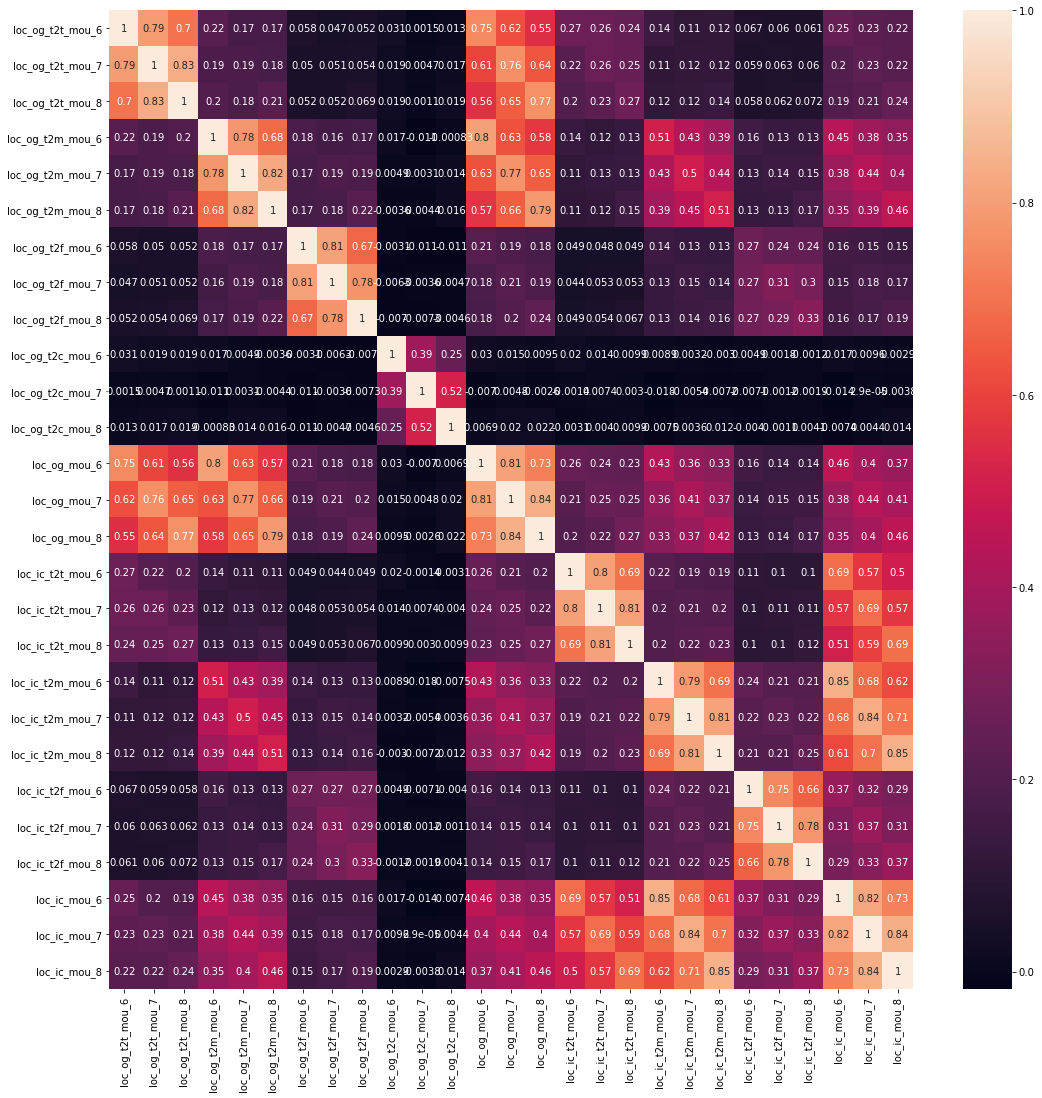

In [71]:
plt.figure(figsize = (18,18))        # Size of the figure
sns.heatmap(high_value_cus[loc_attr_cols].corr(),annot = True)
plt.show()

In [72]:
# Dropping the below mentioned columns as these are highly correlated with some other columns.
drop_cols_2=['loc_ic_t2m_mou_6','loc_ic_t2m_mou_7','loc_ic_t2m_mou_8']

In [73]:
high_value_cus.drop(drop_cols_2, axis=1, inplace=True)

In [74]:
# Filtering all std columns with column name having 'std' in it.
std_attr_cols=high_value_cus.filter(regex=('std')).columns
std_attr_cols

Index(['std_og_t2m_mou_6', 'std_og_t2f_mou_6', 'std_og_t2f_mou_7',
       'std_og_t2f_mou_8', 'std_og_mou_6', 'std_og_mou_7', 'std_og_mou_8',
       'std_ic_t2t_mou_6', 'std_ic_t2t_mou_7', 'std_ic_t2t_mou_8',
       'std_ic_t2m_mou_6', 'std_ic_t2m_mou_7', 'std_ic_t2m_mou_8',
       'std_ic_t2f_mou_6', 'std_ic_t2f_mou_7', 'std_ic_t2f_mou_8',
       'std_ic_mou_6', 'std_ic_mou_7', 'std_ic_mou_8'],
      dtype='object')

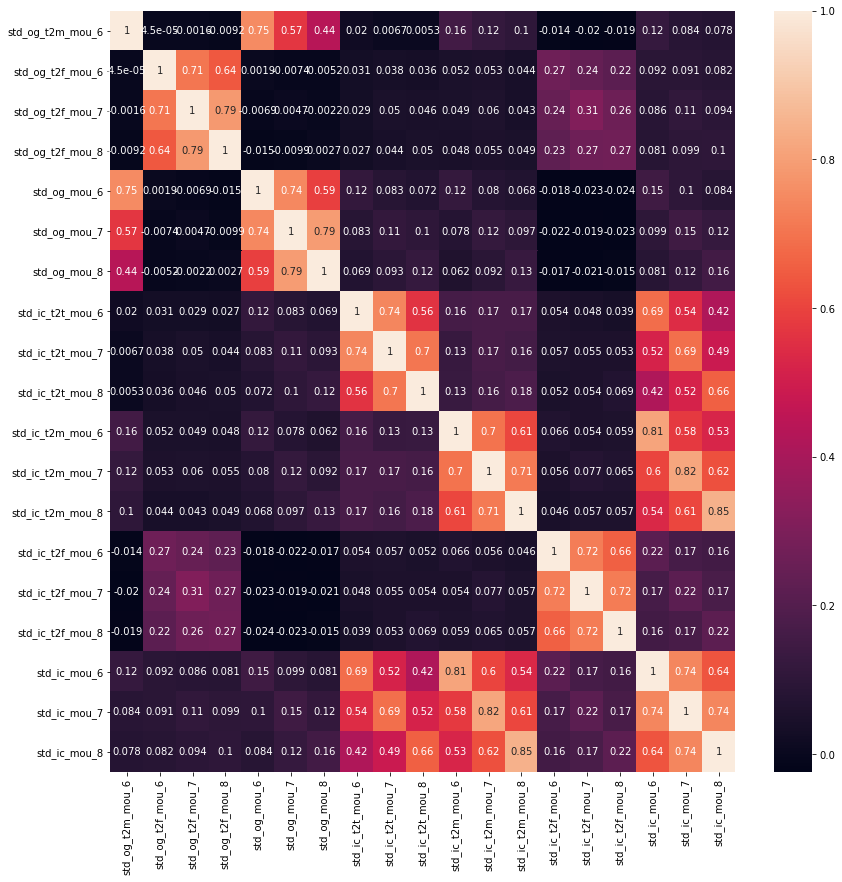

In [75]:
plt.figure(figsize = (14,14))        # Size of the figure
sns.heatmap(high_value_cus[std_attr_cols].corr(),annot = True)
plt.show()

In [76]:
# Dropping the below mentioned columns as these are highly correlated with some other columns.
drop_cols_3=['std_ic_t2m_mou_6','std_ic_t2m_mou_7','std_ic_t2m_mou_8']

In [77]:
high_value_cus.drop(drop_cols_3, axis=1, inplace=True)

In [78]:
# Filtering all recharge columns with column name having 'rech' in it.
rech_attr_cols=high_value_cus.filter(regex=('rech')).columns
rech_attr_cols

Index(['total_rech_num_6', 'total_rech_num_7', 'total_rech_num_8',
       'max_rech_amt_6', 'max_rech_amt_7', 'max_rech_amt_8', 'max_rech_data_6',
       'max_rech_data_7', 'max_rech_data_8', 'total_monthly_rech_6',
       'total_monthly_rech_7', 'total_monthly_rech_8'],
      dtype='object')

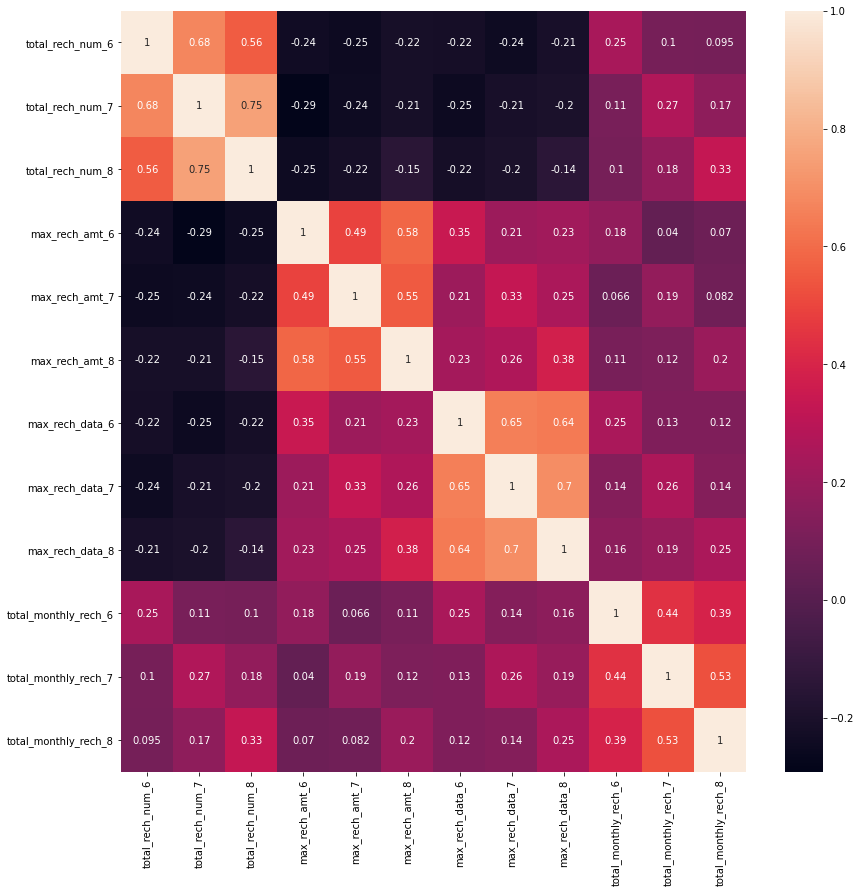

In [79]:
plt.figure(figsize = (14,14))        # Size of the figure
sns.heatmap(high_value_cus[rech_attr_cols].corr(),annot = True)
plt.show()

In [80]:
# Filtering all columns with column name having 'net' in it.
net_attr_cols=high_value_cus.filter(regex=('net')).columns
net_attr_cols

Index(['onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'offnet_mou_6',
       'offnet_mou_7', 'offnet_mou_8'],
      dtype='object')

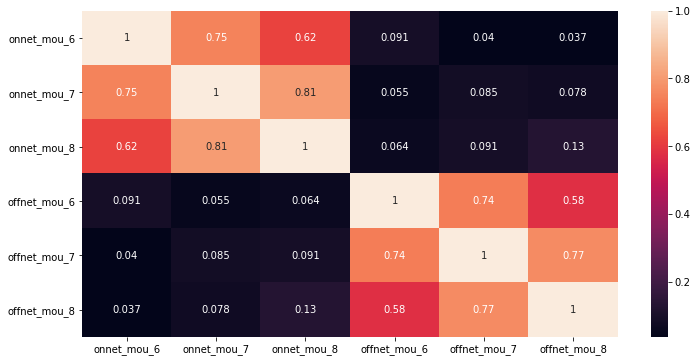

In [81]:
plt.figure(figsize = (12,6))        # Size of the figure
sns.heatmap(high_value_cus[net_attr_cols].corr(),annot = True)
plt.show()

In [82]:
# Filtering all columns with column name having 'mou' in it.
mou_attr_cols=high_value_cus.filter(regex=('mou')).columns
mou_attr_cols

Index(['onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'offnet_mou_6',
       'offnet_mou_7', 'offnet_mou_8', 'roam_ic_mou_6', 'roam_ic_mou_7',
       'roam_ic_mou_8', 'roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8',
       'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8',
       'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8',
       'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8',
       'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8',
       'loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8', 'std_og_t2m_mou_6',
       'std_og_t2f_mou_6', 'std_og_t2f_mou_7', 'std_og_t2f_mou_8',
       'std_og_mou_6', 'std_og_mou_7', 'std_og_mou_8', 'isd_og_mou_6',
       'spl_og_mou_6', 'spl_og_mou_7', 'spl_og_mou_8', 'total_og_mou_6',
       'loc_ic_t2t_mou_6', 'loc_ic_t2t_mou_7', 'loc_ic_t2t_mou_8',
       'loc_ic_t2f_mou_6', 'loc_ic_t2f_mou_7', 'loc_ic_t2f_mou_8',
       'loc_ic_mou_6', 'loc_ic_mou_7', 'loc_ic_mou_8', 'std_ic_t2t_mou_6',
       'std_ic_t2t_mo

In [83]:
# To check correlation between variables and display with correlation > 0.849
telecom_correlation = high_value_cus[mou_attr_cols].corr().abs().unstack().sort_values(kind='quicksort').dropna()
telecom_correlation = telecom_correlation[telecom_correlation != 1.0]
telecom_correlation = telecom_correlation[(telecom_correlation > 0.849)].sort_values(ascending=False)
telecom_correlation

Series([], dtype: float64)

In [84]:
# Filtering all columns with column name having 'ic' in it.
ic_attr_cols=high_value_cus.filter(regex=('ic')).columns
ic_attr_cols

Index(['roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8', 'loc_ic_t2t_mou_6',
       'loc_ic_t2t_mou_7', 'loc_ic_t2t_mou_8', 'loc_ic_t2f_mou_6',
       'loc_ic_t2f_mou_7', 'loc_ic_t2f_mou_8', 'loc_ic_mou_6', 'loc_ic_mou_7',
       'loc_ic_mou_8', 'std_ic_t2t_mou_6', 'std_ic_t2t_mou_7',
       'std_ic_t2t_mou_8', 'std_ic_t2f_mou_6', 'std_ic_t2f_mou_7',
       'std_ic_t2f_mou_8', 'std_ic_mou_6', 'std_ic_mou_7', 'std_ic_mou_8',
       'spl_ic_mou_6', 'spl_ic_mou_7', 'spl_ic_mou_8', 'isd_ic_mou_6',
       'isd_ic_mou_7', 'isd_ic_mou_8', 'ic_others_6', 'ic_others_7',
       'ic_others_8'],
      dtype='object')

In [85]:
# To check correlation between variables and display with correlation > 0.845
telecom_correlation = high_value_cus[ic_attr_cols].corr().abs().unstack().sort_values(kind='quicksort').dropna()
telecom_correlation = telecom_correlation[telecom_correlation != 1.0]
telecom_correlation = telecom_correlation[(telecom_correlation > 0.845)].sort_values(ascending=False)
telecom_correlation

Series([], dtype: float64)

In [86]:
# Filtering all columns with column name having 'og' in it.
og_attr_cols=high_value_cus.filter(regex=('og')).columns
og_attr_cols

Index(['roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8', 'loc_og_t2t_mou_6',
       'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8', 'loc_og_t2m_mou_6',
       'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8', 'loc_og_t2f_mou_6',
       'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8', 'loc_og_t2c_mou_6',
       'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8', 'loc_og_mou_6', 'loc_og_mou_7',
       'loc_og_mou_8', 'std_og_t2m_mou_6', 'std_og_t2f_mou_6',
       'std_og_t2f_mou_7', 'std_og_t2f_mou_8', 'std_og_mou_6', 'std_og_mou_7',
       'std_og_mou_8', 'isd_og_mou_6', 'spl_og_mou_6', 'spl_og_mou_7',
       'spl_og_mou_8', 'og_others_6', 'og_others_7', 'og_others_8',
       'total_og_mou_6'],
      dtype='object')

In [87]:
# To check correlation between variables and display with correlation > 0.845
telecom_correlation = high_value_cus[og_attr_cols].corr().abs().unstack().sort_values(kind='quicksort').dropna()
telecom_correlation = telecom_correlation[telecom_correlation != 1.0]
telecom_correlation = telecom_correlation[(telecom_correlation > 0.845)].sort_values(ascending=False)
telecom_correlation

Series([], dtype: float64)

In [88]:
# Lastly, dropping columns related to 'last_day_rch_amt_' as these do not give any important information
drop_cols_4=['last_day_rch_amt_6','last_day_rch_amt_7','last_day_rch_amt_8']

In [89]:
high_value_cus.drop(drop_cols_4, axis=1, inplace=True)

In [90]:
high_value_cus.shape

(30001, 107)

In [91]:
# Checking the percentage of null values in each column
((high_value_cus.isnull().sum()/len(high_value_cus.index))*100).round(2).sort_values(ascending=False).head(60)

arpu_6                  0.0
max_rech_data_8         0.0
max_rech_data_6         0.0
max_rech_amt_8          0.0
max_rech_amt_7          0.0
max_rech_amt_6          0.0
total_rech_num_8        0.0
total_rech_num_7        0.0
total_rech_num_6        0.0
ic_others_8             0.0
ic_others_7             0.0
ic_others_6             0.0
isd_ic_mou_8            0.0
isd_ic_mou_7            0.0
isd_ic_mou_6            0.0
spl_ic_mou_8            0.0
spl_ic_mou_7            0.0
spl_ic_mou_6            0.0
std_ic_mou_8            0.0
std_ic_mou_7            0.0
std_ic_mou_6            0.0
std_ic_t2f_mou_8        0.0
std_ic_t2f_mou_7        0.0
std_ic_t2f_mou_6        0.0
std_ic_t2t_mou_8        0.0
max_rech_data_7         0.0
vol_2g_mb_6             0.0
std_ic_t2t_mou_6        0.0
vol_2g_mb_7             0.0
total_monthly_rech_8    0.0
total_monthly_rech_7    0.0
total_monthly_rech_6    0.0
jun_vbc_3g              0.0
jul_vbc_3g              0.0
aug_vbc_3g              0.0
aon                 

In [92]:
high_value_cus.info('all')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30001 entries, 0 to 99997
Data columns (total 107 columns):
 #    Column                Dtype  
---   ------                -----  
 0    arpu_6                float64
 1    arpu_7                float64
 2    arpu_8                float64
 3    onnet_mou_6           float64
 4    onnet_mou_7           float64
 5    onnet_mou_8           float64
 6    offnet_mou_6          float64
 7    offnet_mou_7          float64
 8    offnet_mou_8          float64
 9    roam_ic_mou_6         float64
 10   roam_ic_mou_7         float64
 11   roam_ic_mou_8         float64
 12   roam_og_mou_6         float64
 13   roam_og_mou_7         float64
 14   roam_og_mou_8         float64
 15   loc_og_t2t_mou_6      float64
 16   loc_og_t2t_mou_7      float64
 17   loc_og_t2t_mou_8      float64
 18   loc_og_t2m_mou_6      float64
 19   loc_og_t2m_mou_7      float64
 20   loc_og_t2m_mou_8      float64
 21   loc_og_t2f_mou_6      float64
 22   loc_og_t2f_mou_7    

### ------------------------------- Data is Clean -------------------------- ###

### Derive New Features
* **We have already derived some feature previously - total_monthly_rech_6, total_monthly_rech_7 and total_monthly_rech_8.**
* **Let's derive a new feature 'term' from column 'aon' (AON - Age on network - number of days the customer is using the operator T network)**

In [93]:
# Deriving new feature 'term' from column 'aon' (AON - Age on network - number of days the customer is using the operator T network)
high_value_cus['term']=(high_value_cus['aon']/30).round(0)

# Dropping 'aon'
high_value_cus.drop('aon', axis=1, inplace=True)

In [94]:
high_value_cus.shape

(30001, 107)

In [95]:
# Storing all the column names of the high_value_cus DataFrame in num_cols
num_cols = high_value_cus.columns.values.tolist()

In [96]:
num_cols

['arpu_6',
 'arpu_7',
 'arpu_8',
 'onnet_mou_6',
 'onnet_mou_7',
 'onnet_mou_8',
 'offnet_mou_6',
 'offnet_mou_7',
 'offnet_mou_8',
 'roam_ic_mou_6',
 'roam_ic_mou_7',
 'roam_ic_mou_8',
 'roam_og_mou_6',
 'roam_og_mou_7',
 'roam_og_mou_8',
 'loc_og_t2t_mou_6',
 'loc_og_t2t_mou_7',
 'loc_og_t2t_mou_8',
 'loc_og_t2m_mou_6',
 'loc_og_t2m_mou_7',
 'loc_og_t2m_mou_8',
 'loc_og_t2f_mou_6',
 'loc_og_t2f_mou_7',
 'loc_og_t2f_mou_8',
 'loc_og_t2c_mou_6',
 'loc_og_t2c_mou_7',
 'loc_og_t2c_mou_8',
 'loc_og_mou_6',
 'loc_og_mou_7',
 'loc_og_mou_8',
 'std_og_t2m_mou_6',
 'std_og_t2f_mou_6',
 'std_og_t2f_mou_7',
 'std_og_t2f_mou_8',
 'std_og_mou_6',
 'std_og_mou_7',
 'std_og_mou_8',
 'isd_og_mou_6',
 'spl_og_mou_6',
 'spl_og_mou_7',
 'spl_og_mou_8',
 'og_others_6',
 'og_others_7',
 'og_others_8',
 'total_og_mou_6',
 'loc_ic_t2t_mou_6',
 'loc_ic_t2t_mou_7',
 'loc_ic_t2t_mou_8',
 'loc_ic_t2f_mou_6',
 'loc_ic_t2f_mou_7',
 'loc_ic_t2f_mou_8',
 'loc_ic_mou_6',
 'loc_ic_mou_7',
 'loc_ic_mou_8',
 'std_ic_t

## Exploratory Data Analysis

### Univariate Analysis

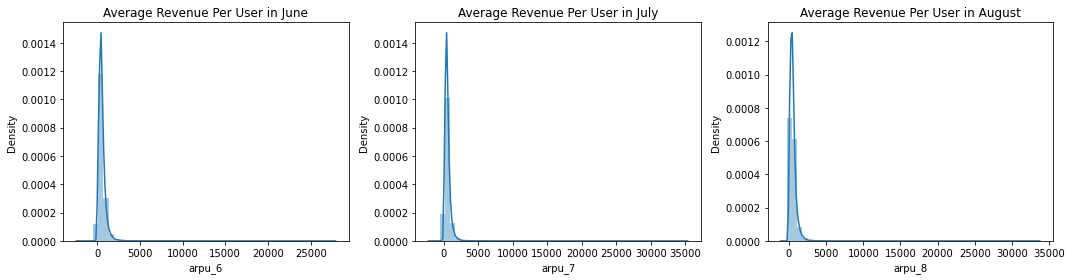

In [97]:
# Plotting for ARPU (Average Revenue Per User)

fig = plt.figure(figsize=(15,4))

# Subplot 1 - ARPU in June
ax1 = plt.subplot(131)
sns.distplot(high_value_cus.arpu_6,ax=ax1)
plt.title('Average Revenue Per User in June')

# Subplot 1 - ARPU in July
ax2 = plt.subplot(132)
sns.distplot(high_value_cus.arpu_7,ax=ax2)
plt.title('Average Revenue Per User in July')

# Subplot 1 - ARPU in August
ax3 = plt.subplot(133)
sns.distplot(high_value_cus.arpu_8,ax=ax3)
plt.title('Average Revenue Per User in August')
plt.tight_layout()
plt.show()

In [98]:
# Binning for 'term' feature
month_bins = [0,6,12,36,60,66]
month_labels = ['0-6 Months','6-12 Months','1-3 Years','3-5 Years','More Than 5 Years']
high_value_cus['term_range']=pd.cut(high_value_cus['term'],month_bins,labels=month_labels)

In [99]:
# Drop the variable 'term' as 'term_range' gives more specific information
high_value_cus.drop('term', axis=1, inplace=True)

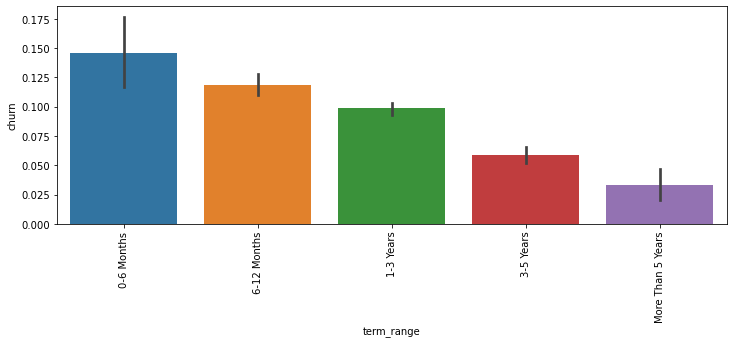

In [100]:
# Plotting a bar plot for term_range
fig = plt.figure(figsize=(12,4))
ax = sns.barplot(x='term_range', y='churn', data=high_value_cus)
plt.xticks(rotation=90)
plt.show()

**INFERENCE: Churn rate is maximum in first 6 months and least if customer is using the network for more than 5 years.** 

### Bivariate Analysis

In [101]:
#Plot for Total monthly recharge in the 6th, 7th and 8th month Vs Churn
def plot_box_chart(par):
    plt.figure(figsize=(18,16))
    df_cus = high_value_cus
    plt.subplot(2,3,1)
    sns.boxplot(data=df_cus, y=par+'_6',x="churn",hue="churn",
                showfliers=False,palette=("GnBu"))
    plt.subplot(2,3,2)
    sns.boxplot(data=df_cus, y=par+'_7',x="churn",hue="churn",
                showfliers=False,palette=("GnBu"))
    plt.subplot(2,3,3)
    sns.boxplot(data=df_cus, y=par+'_8',x="churn",hue="churn",
                showfliers=False,palette=("GnBu"))
 
    plt.show()

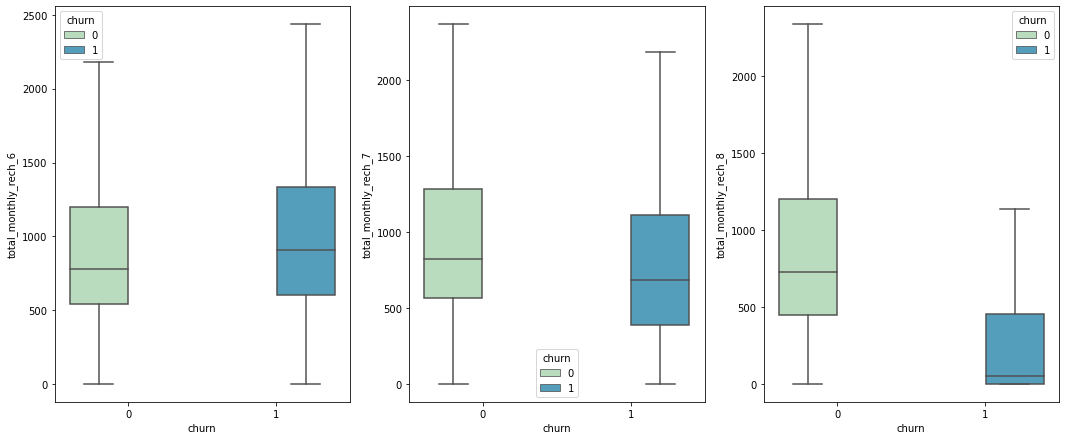

In [102]:
plot_box_chart('total_monthly_rech')

**INFERENCE: As we can observe from the above plot,the total monthly recharge is least in the 8th month, This indicates that the customers who make the least recharges in 8th month are highly likely to churn.**

In [103]:
def plt_box_chart(pars):
    plt.figure(figsize=(18,16))
    df_cus = high_value_cus
    plt.subplot(2,3,1)
    sns.boxplot(data=df_cus, y=pars+'_6',x="churn",hue="churn",
                showfliers=False,palette=("RdBu"))
    plt.subplot(2,3,2)
    sns.boxplot(data=df_cus, y=pars+'_7',x="churn",hue="churn",
                showfliers=False,palette=("RdBu"))
    plt.subplot(2,3,3)
    sns.boxplot(data=df_cus, y=pars+'_8',x="churn",hue="churn",
                showfliers=False,palette=("RdBu"))
 
    plt.show()

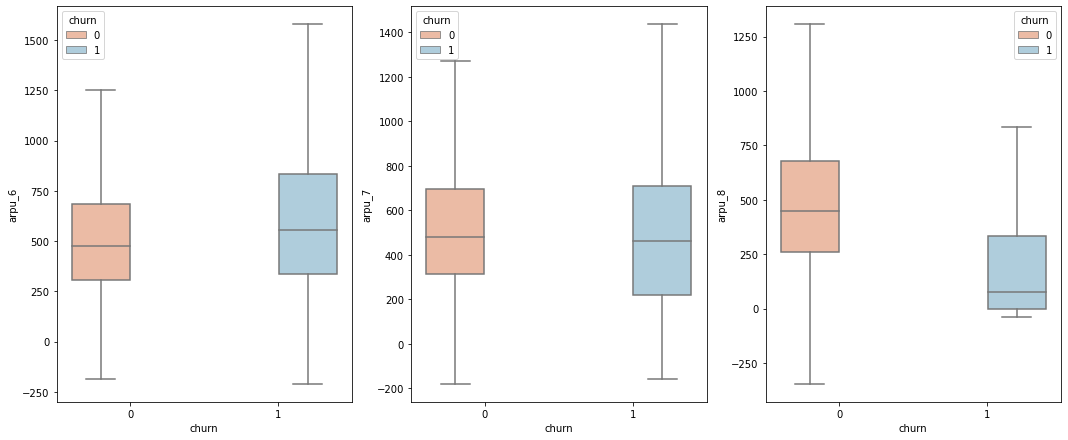

In [104]:
# Plot for average revenue per user for 6th, 7th and 8th month Vs Churn
plt_box_chart('arpu')

**INFERENCE: From the above plot, we can conclude that the average for 8th month is the least when compared to 6th, 7th months. This indicates that the customers who generate the least revenue in the 8th month are highly likely to churn.**

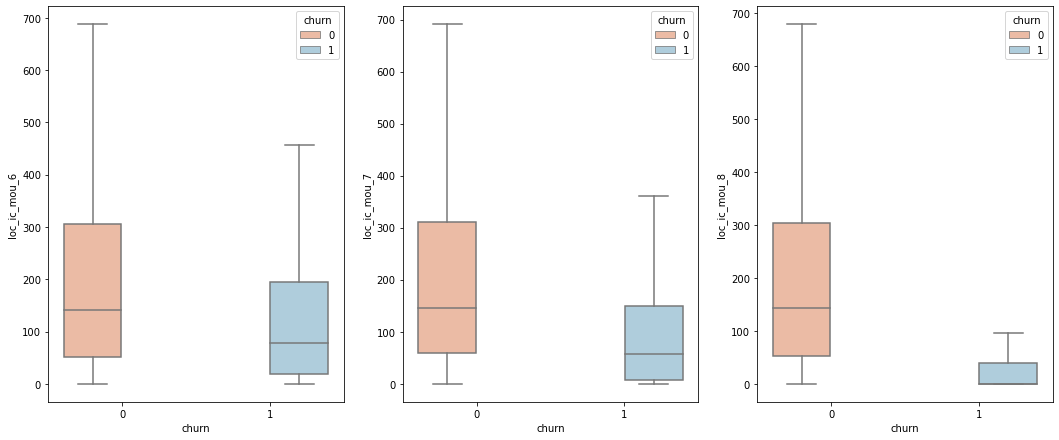

In [105]:
# Plot for local Incoming coming call usage for 6th, 7th and 8th month Vs Churn
plt_box_chart('loc_ic_mou')

**INFERENCE: Incoming call value for the 8th month is the lowest for the people who churn, therefore, Customers who receive the least local incoming calls in the 8th month are highly likely to churn.**

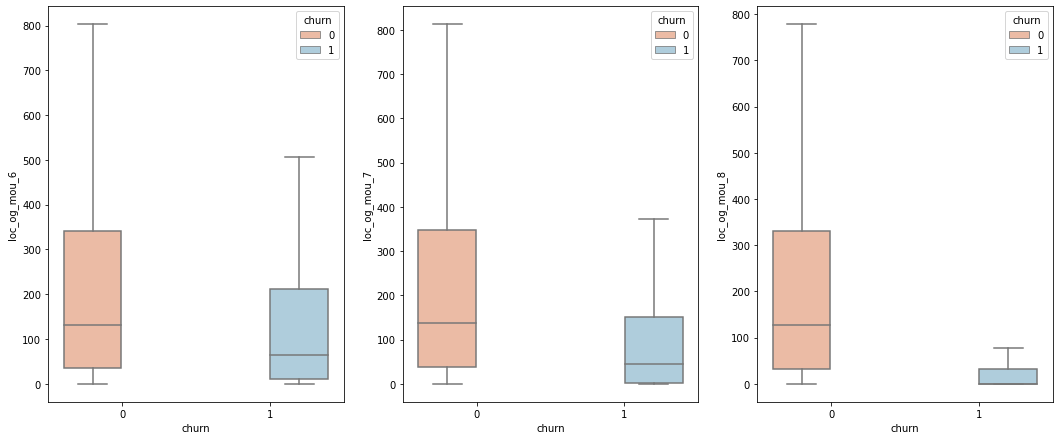

In [106]:
# Plot for local Outgoing coming call usage for 6th, 7th and 8th month Vs Churn
plt_box_chart('loc_og_mou')

**INFERENCE: Outgoing call value for the 8th month is the lowest for the people who churn. Therefore, customers who make the least local calls in the 8th month are highly likely to churn.**

### Create Dummy Variables for Categorical Variables

In [107]:
# Create dummy variables for 'term_range' using the 'get_dummies' command
dummy = pd.get_dummies(high_value_cus['term_range'], drop_first=True)

In [108]:
# Add the results to the master dataframe
high_value_cus = pd.concat([high_value_cus, dummy], axis=1)

In [109]:
# Drop the variable 'term_range' for which the dummy variables have been created
high_value_cus.drop('term_range', axis=1, inplace=True)

In [110]:
high_value_cus.info('all')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30001 entries, 0 to 99997
Data columns (total 110 columns):
 #    Column                Dtype  
---   ------                -----  
 0    arpu_6                float64
 1    arpu_7                float64
 2    arpu_8                float64
 3    onnet_mou_6           float64
 4    onnet_mou_7           float64
 5    onnet_mou_8           float64
 6    offnet_mou_6          float64
 7    offnet_mou_7          float64
 8    offnet_mou_8          float64
 9    roam_ic_mou_6         float64
 10   roam_ic_mou_7         float64
 11   roam_ic_mou_8         float64
 12   roam_og_mou_6         float64
 13   roam_og_mou_7         float64
 14   roam_og_mou_8         float64
 15   loc_og_t2t_mou_6      float64
 16   loc_og_t2t_mou_7      float64
 17   loc_og_t2t_mou_8      float64
 18   loc_og_t2m_mou_6      float64
 19   loc_og_t2m_mou_7      float64
 20   loc_og_t2m_mou_8      float64
 21   loc_og_t2f_mou_6      float64
 22   loc_og_t2f_mou_7    

### Train-Test Split
**Split the dataset into training and testing sets.**

In [111]:
# Import the required library
from sklearn.model_selection import train_test_split

In [112]:
# Put feature variables into X
X = high_value_cus.drop(['churn'], axis=1)
X.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2m_mou_6,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,total_monthly_rech_6,total_monthly_rech_7,total_monthly_rech_8,6-12 Months,1-3 Years,3-5 Years,More Than 5 Years
0,197.385,214.816,213.803,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.16,0.00,0.00,1.15,0.00,0.00,5.44,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,4,3,2,252,252,252,252.0,252.0,252.0,30.13,1.32,5.75,83.57,150.76,109.61,0,0,0,0,0,0,1,1,1,0,0,0,30.40,0.00,101.20,614.0,504.0,504.0,0,1,0,0
7,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.38,162.28,62.13,55.14,53.23,0.0,0.0,0.00,422.16,533.91,255.79,49.89,6.66,20.08,16.68,60.86,75.14,77.84,0.0,4.5,0.0,6.50,0.0,0.0,0.0,487.53,58.14,32.26,27.31,152.16,101.46,39.53,427.88,355.23,188.04,36.89,11.83,30.39,52.19,34.24,22.21,180.54,173.08,193.94,0.21,0.0,0.0,2.06,14.53,31.59,15.74,15.19,15.14,5,5,7,1580,790,1580,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,57.74,19.38,18.74,1580.0,790.0,3638.0,0,1,0,0
8,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,80.96,70.58,50.54,0.00,0.00,0.00,0.0,0.0,7.15,378.09,288.18,63.04,13.69,0.00,0.00,0.00,130.26,143.48,98.28,0.0,0.0,0.0,10.23,0.0,0.0,0.0,508.36,23.84,9.84,0.31,0.00,0.00,0.00,81.43,23.83,15.79,0.00,0.58,0.10,0.00,0.00,0.00,22.43,4.66,0.75,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,19,21,14,90,154,30,0.0,154.0,23.0,0.00,356.00,0.03,0.00,750.95,11.94,0,1,0,0,1,3,0,0,0,0,0,0,21.03,910.65,122.16,437.0,955.0,327.0,1,0,0,0
21,514.453,597.753,637.760,102.41,132.11,85.14,757.93,896.68,983.39,0.00,0.00,0.00,0.00,0.00,0.00,4.48,6.16,23.34,91.81,87.93,104.81,0.75,0.00,1.58,0.0,0.0,0.00,97.04,94.09,129.74,665.36,0.00,0.00,0.00,763.29,934.69,938.79,0.0,0.0,0.0,0.00,0.0,0.0,0.0,860.34,2.48,10.19,19.54,4.61,2.84,10.39,125.33,87.68,159.11,14.06,5.98,0.18,0.00,0.00,0.00,81.76,44.21,101.93,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,22,26,27,50,50,50,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,0.00,0.00,0.00,600.0,680.0,718.0,0,1,0,0
23,74.350,193.897,366.966,48.96,50.66,33.58,85.41,89.36,205.89,0.00,0.00,0.00,0.00,0.00,0.00,48.96,50.66,33.58,82.94,83.01,148.56,0.00,0.00,0.00,0.0,0.0,17.71,131.91,133.68,182.14,2.36,0.00,0.00,0.00,2.36,6.35,39.61,0.0,0.1,0.0,17.71,0.0,0.0,0.0,134.38,20.71,61.04,76.64,0.00,0.00,0.71,116.63,174.41,224.21,0.51,0.00,13.38,

In [113]:
# Put target variable in y
y = high_value_cus['churn']
y.head()

0     1
7     1
8     0
21    0
23    0
Name: churn, dtype: int64

In [114]:
# Splitting the data into train and test (i.e. 70% train and 30% test with random_state=100)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [115]:
X_train.shape

(21000, 109)

In [116]:
X_test.shape

(9001, 109)

In [117]:
y_train.shape

(21000,)

In [118]:
y_test.shape

(9001,)

In [119]:
# Storing all the column names of the X DataFrame in X_cols
X_cols = X.columns.values.tolist()

### Feature Scaling

In [120]:
# Import StandardScaler
from sklearn.preprocessing import StandardScaler

In [121]:
scaler = StandardScaler()
X_train[X_cols] = scaler.fit_transform(X_train[X_cols]) #Train Data
X_train.shape

(21000, 109)

## Class Imbalance

In [122]:
# Checking the churn and non-churn percentage
imbalance=high_value_cus['churn'].value_counts(normalize=True)*100
imbalance

0    91.863605
1     8.136395
Name: churn, dtype: float64

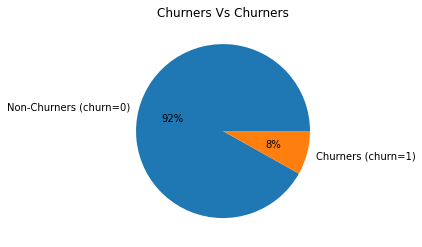

In [123]:
# Plotting Pie Plot
plt.pie(imbalance, labels = ['Non-Churners (churn=0)','Churners (churn=1)'],autopct="%1.0f%%")
plt.title('Churners Vs Churners')
plt.show()

## Logistic Regression Model Building

In [124]:
import statsmodels.api as sm

In [125]:
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                21000
Model:                            GLM   Df Residuals:                    20890
Model Family:                Binomial   Df Model:                          109
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3797.9
Date:                Fri, 25 Feb 2022   Deviance:                       7595.8
Time:                        23:12:35   Pearson chi2:                 1.42e+10
No. Iterations:                     9                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -4.2141      0.077    -54.897      0.000      -4.365      -4.064
arpu_6                   0.3184      0.082      3.890      0.000       0.158       0.479
arpu_7                   0.1679      0.095      1.767      0.077      -0.018       0.354
arpu_8                  -0.3822      0.096     -3.980      0.000      -0.570      -0.194
onnet_mou_6             -0.2012      2.774     -0.073      0.942      -5.638       5.235
onnet_mou_7             -0.2969      1.454     -0.204      0.838      -3.147       2.553
onnet_mou_8             -2.6906      1.858     -1.448      0.148      -6.332       0.950
offnet_mou_6            -0.2101      2.915     -0.072      0.943      -5.922       5.502
offnet_mou_7            -0.1522      1.528     -0.100      0.921      -3.146       2.842
offnet_mou_8            -3.0660      1.953     -1.570      0.116      -6.893       0.761
roam_ic_mou_6            0.0595      0.037      1.630      0.103      -0.012       0.131
roam_ic_mou_7            0.0405      0.036      1.117      0.264      -0.031       0.112
roam_ic_mou_8           -0.0332      0.033     -0.999      0.318      -0.098       0.032
roam_og_mou_6            0.0461      0.690      0.067      0.947      -1.305       1.398
roam_og_mou_7            0.1472      0.290      0.508      0.611      -0.420       0.715
roam_og_mou_8            0.6123      0.410      1.494      0.135      -0.191       1.415
loc_og_t2t_mou_6       223.0484   1252.154      0.178      0.859   -2231.128    2677.225
loc_og_t2t_mou_7      1924.5296   1348.892      1.427      0.154    -719.250    4568.309
loc_og_t2t_mou_8      1.276e+04   1529.590      8.340      0.000    9758.094    1.58e+04
loc_og_t2m_mou_6       247.7367   1390.891      0.178      0.859   -2478.360    2973.833
loc_og_t2m_mou_7      1922.0389   1347.267      1.427      0.154    -718.555    4562.633
loc_og_t2m_mou_8      1.287e+04   1543.028      8.339      0.000    9843.633    1.59e+04
loc_og_t2f_mou_6        22.1256    124.391      0.178      0.859    -221.677     265.928
loc_og_t2f_mou_7       175.3470    122.919      1.427      0.154     -65.569     416.263
loc_og_t2f_mou_8      1059.5895    127.048      8.340      0.000     810.580    1308.599
loc_og_t2c_mou_6        -0.1122      0.041     -2.727      0.006      -0.193      -0.032
loc_og_t2c_mou_7        -0.0213      0.050     -0.426      0.670      -0.120       0.077
loc_og_t2c_mou_8         0.0657      0.053      1.244      0.214      -0.038       0.169
loc_og_mou_6         -2155.5460   2655.085     -0.812      0.417   -7359.417    3048.325
loc_og_mou_7         -2987.8236   2094.439     -1.427      0.154   -7092.848    1117.201
loc_og_mou_8         -2.018e+04   2420.086     -8.339      0.000   -2.49e+04   -1.54e+04
std_og_t2m_mou_6         0.0176      0.257      0.069    

### Logistic Regression (with RFE)
* **Feature Selection Using Recursive Feature Elimination (RFE)**
* **Acceptable range for keeping the feature is VIF < 5 and p-value < 0.05.**
* **class_weight='balanced' is used to handle class imbalance.**

In [126]:
# Importing LogisticRegression. class_weight='balanced' is used to handle class imbalance.
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(class_weight='balanced')

In [127]:
from sklearn.feature_selection import RFE

In [128]:
rfe = RFE(logreg, n_features_to_select=15)             # running RFE with 15 variables as output

In [129]:
rfe = rfe.fit(X_train, y_train)

In [130]:
# To see which features have been selected by RFE
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('arpu_6', True, 1),
 ('arpu_7', False, 64),
 ('arpu_8', False, 48),
 ('onnet_mou_6', False, 17),
 ('onnet_mou_7', False, 13),
 ('onnet_mou_8', True, 1),
 ('offnet_mou_6', False, 82),
 ('offnet_mou_7', False, 14),
 ('offnet_mou_8', True, 1),
 ('roam_ic_mou_6', False, 46),
 ('roam_ic_mou_7', False, 83),
 ('roam_ic_mou_8', False, 90),
 ('roam_og_mou_6', False, 89),
 ('roam_og_mou_7', False, 3),
 ('roam_og_mou_8', True, 1),
 ('loc_og_t2t_mou_6', False, 77),
 ('loc_og_t2t_mou_7', True, 1),
 ('loc_og_t2t_mou_8', False, 25),
 ('loc_og_t2m_mou_6', False, 18),
 ('loc_og_t2m_mou_7', False, 68),
 ('loc_og_t2m_mou_8', False, 30),
 ('loc_og_t2f_mou_6', False, 58),
 ('loc_og_t2f_mou_7', False, 80),
 ('loc_og_t2f_mou_8', False, 57),
 ('loc_og_t2c_mou_6', False, 49),
 ('loc_og_t2c_mou_7', False, 53),
 ('loc_og_t2c_mou_8', False, 42),
 ('loc_og_mou_6', False, 87),
 ('loc_og_mou_7', False, 5),
 ('loc_og_mou_8', False, 56),
 ('std_og_t2m_mou_6', False, 15),
 ('std_og_t2f_mou_6', False, 73),
 ('std_og_t

In [131]:
# Put all the columns selected by RFE in the variable 'rfe_col'
rfe_col = X_train.columns[rfe.support_]

In [132]:
rfe_col

Index(['arpu_6', 'onnet_mou_8', 'offnet_mou_8', 'roam_og_mou_8',
       'loc_og_t2t_mou_7', 'std_og_mou_7', 'std_og_mou_8', 'loc_ic_mou_7',
       'loc_ic_mou_8', 'std_ic_t2t_mou_8', 'total_rech_num_8', 'vol_2g_mb_8',
       'monthly_2g_8', 'sachet_2g_8', 'monthly_3g_8'],
      dtype='object')

In [133]:
# Creating X_train_rfe dataframe with RFE selected variables
X_train_rfe = X_train[rfe_col]

In [134]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [135]:
def VIF_GLM(X_train_m,y_train_m):
    
    # Create a dataframe that will contain the names of all the feature variables and their respective VIFs
    vif = pd.DataFrame()
    vif['Features'] = X_train_m.columns
    vif['VIF'] = [variance_inflation_factor(X_train_m.values, i) for i in range(X_train_m.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    print(vif)
    print()
    
    # Adding a constant variable 
    X_train_lm = sm.add_constant(X_train_m)
    
    # Refit the model with the new set of features
    logm = sm.GLM(y_train_m,X_train_lm, family = sm.families.Binomial())
    res = logm.fit()
    print(res.summary())
    print()
    
    return

### Model 1 - All variables selected by RFE

In [136]:
X_train_rfe.shape

(21000, 15)

In [137]:
VIF_GLM(X_train_rfe,y_train)

            Features   VIF
6       std_og_mou_8  9.47
1        onnet_mou_8  4.77
2       offnet_mou_8  3.96
8       loc_ic_mou_8  3.73
7       loc_ic_mou_7  3.47
5       std_og_mou_7  2.99
4   loc_og_t2t_mou_7  1.93
10  total_rech_num_8  1.46
13       sachet_2g_8  1.36
0             arpu_6  1.25
11       vol_2g_mb_8  1.23
12      monthly_2g_8  1.18
3      roam_og_mou_8  1.16
14      monthly_3g_8  1.06
9   std_ic_t2t_mou_8  1.03

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  churn   No. Observations:                21000
Model:                            GLM   Df Residuals:                    20984
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4044.3
Date:                Fri, 25 Feb 2022   Deviance:                       8088.5
Time:         

**The variables `std_og_mou_8` has a very high VIF. Let's drop it.**

In [138]:
X_train_rfe = X_train_rfe.drop('std_og_mou_8', axis = 1)

### Model 2

In [139]:
X_train_rfe.shape

(21000, 14)

In [140]:
VIF_GLM(X_train_rfe,y_train)

            Features   VIF
7       loc_ic_mou_8  3.62
6       loc_ic_mou_7  3.47
5       std_og_mou_7  2.19
1        onnet_mou_8  2.05
2       offnet_mou_8  1.67
9   total_rech_num_8  1.46
4   loc_og_t2t_mou_7  1.41
12       sachet_2g_8  1.36
10       vol_2g_mb_8  1.23
0             arpu_6  1.19
11      monthly_2g_8  1.18
13      monthly_3g_8  1.06
3      roam_og_mou_8  1.05
8   std_ic_t2t_mou_8  1.03

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  churn   No. Observations:                21000
Model:                            GLM   Df Residuals:                    20985
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4064.4
Date:                Fri, 25 Feb 2022   Deviance:                       8128.8
Time:                        23:13:23   P

**The variables `loc_og_t2t_mou_7` has a p-value > 0.05. Let's drop it.**

In [141]:
X_train_rfe = X_train_rfe.drop('loc_og_t2t_mou_7', axis = 1)

### Model 3

In [142]:
X_train_rfe.shape

(21000, 13)

In [143]:
VIF_GLM(X_train_rfe,y_train)

            Features   VIF
6       loc_ic_mou_8  3.62
5       loc_ic_mou_7  3.43
4       std_og_mou_7  1.97
2       offnet_mou_8  1.63
1        onnet_mou_8  1.56
8   total_rech_num_8  1.45
11       sachet_2g_8  1.36
9        vol_2g_mb_8  1.23
0             arpu_6  1.18
10      monthly_2g_8  1.18
12      monthly_3g_8  1.06
3      roam_og_mou_8  1.04
7   std_ic_t2t_mou_8  1.02

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  churn   No. Observations:                21000
Model:                            GLM   Df Residuals:                    20986
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4065.8
Date:                Fri, 25 Feb 2022   Deviance:                       8131.6
Time:                        23:13:23   Pearson chi2:               

* **The VIF value and p-value of all the features are now in the acceptable range (i.e. VIF < 5 and p-value < 0.05).**
* **Let's keep all these 13 features. Finalizing this model i.e. Model 3.**

In [144]:
final_cols = X_train_rfe.columns
final_cols

Index(['arpu_6', 'onnet_mou_8', 'offnet_mou_8', 'roam_og_mou_8',
       'std_og_mou_7', 'loc_ic_mou_7', 'loc_ic_mou_8', 'std_ic_t2t_mou_8',
       'total_rech_num_8', 'vol_2g_mb_8', 'monthly_2g_8', 'sachet_2g_8',
       'monthly_3g_8'],
      dtype='object')

In [145]:
# Adding a constant variable 
X_train_lm = sm.add_constant(X_train_rfe)

In [146]:
# Refit the model with the new set of features
logm = sm.GLM(y_train,X_train_lm, family = sm.families.Binomial())
res = logm.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                21000
Model:                            GLM   Df Residuals:                    20986
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4065.8
Date:                Fri, 25 Feb 2022   Deviance:                       8131.6
Time:                        23:13:23   Pearson chi2:                 5.95e+06
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -4.3410      0.080    -54.465      0.000      -4.497      -4.185
arpu_6               0.2181      0.029      7.510      0.000       0.161       0.275
onnet_mou_8         -0.5664      0.059     -9.561      0.000      -0.682      -0.450
offnet_mou_8        -0.8513      0.072    -11.875      0.000      -0.992      -0.711
roam_og_mou_8        0.1840      0.023      7.945      0.000       0.139       0.229
std_og_mou_7         0.3672      0.037      9.936      0.000       0.295       0.440
loc_ic_mou_7         0.6984      0.069     10.121      0.000       0.563       0.834
loc_ic_mou_8        -3.0620      0.158    -19.353      0.000      -3.372      -2.752
std_ic_t2t_mou_8    -0.2273      0.091     -2.511      0.012      -0.405      -0.050
total_rech_num_8    -0.4151      0.059     -6.990      0.000      -0.531      -0.299
vol_2g_mb_8         -0.5540      0.108     -5.143      0.000      -0.765      -0.343
monthly_2g_8        -0.7025      0.071     -9.834      0.000      -0.843      -0.562
sachet_2g_8         -0.6780      0.082     -8.237      0.000      -0.839      -0.517
monthly_3g_8        -0.6667      0.060    -11.072      0.000      -0.785      -0.549
====================================================================================
"""

### Model Evaluation

In [147]:
# Use 'predict' to predict the probabilities on the train set
y_train_pred = res.predict(sm.add_constant(X_train_rfe))
y_train_pred[:10]

39186    1.519132e-01
39833    1.188306e-02
38778    4.309068e-02
43026    9.658844e-08
12271    1.329280e-03
33607    3.440702e-03
51913    9.404018e-05
16668    1.942599e-03
54924    3.499280e-02
33733    3.386712e-02
dtype: float64

In [148]:
# Reshaping it into an array
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([1.51913170e-01, 1.18830604e-02, 4.30906790e-02, 9.65884447e-08,
       1.32927999e-03, 3.44070210e-03, 9.40401762e-05, 1.94259872e-03,
       3.49927952e-02, 3.38671165e-02])

In [149]:
# Importing libraries
from sklearn import metrics # Import metrics from sklearn for evaluation
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score

#### Creating a dataframe with the actual conversion flag and the predicted probabilities

In [150]:
# Create a new dataframe containing the actual conversion flag and the probabilities predicted by the model
y_train_pred_final = pd.DataFrame({'Churn':y_train.values, 'Churn_Prob':y_train_pred})
y_train_pred_final.head()

,Churn,Churn_Prob
0,0,1.519132e-01
1,0,1.188306e-02
2,0,4.309068e-02
3,0,9.658844e-08
4,0,1.329280e-03


#### Creating new column 'Predicted_Churn' with value 1 if Churn_Prob > 0.5, else 0

In [151]:
# Lets check with probability cutoff 0.5
y_train_pred_final['Predicted_Churn'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Churn,Churn_Prob,Predicted_Churn
0,0,1.519132e-01,0
1,0,1.188306e-02,0
2,0,4.309068e-02,0
3,0,9.658844e-08,0
4,0,1.329280e-03,0


In [152]:
def eval_mat(actual,predicted):
    # Create Confusion Matrix for train set
    con_matrix = confusion_matrix(actual.Churn,predicted.Predicted_Churn)
    print('Confusion Matrix')
    print(con_matrix)
    print()
    
    # Let's check the overall accuracy on train set.
    accuracy = metrics.accuracy_score(actual.Churn,predicted.Predicted_Churn)
    
    # Let's evaluate the other metrics as well
    TP = con_matrix[1,1] # true positive 
    TN = con_matrix[0,0] # true negatives
    FP = con_matrix[0,1] # false positives
    FN = con_matrix[1,0] # false negatives
    
    # Calculate the Sensitivity/Recall
    sensitivity = TP/(TP+FN)
    
    # Calculate the specificity
    specificity = TN/(TN+FP)
    
    # Calculate false postive rate - predicting churn when customer does not churn
    false_pos = FP/float(TN+FP)    
    
    # Positive predictive value 
    pos_pred = TP/float(TP+FP)
    
    # True Negative predictive value
    neg_pred = TN/float(TN+FN)

    print("Evaluation Metrics Scores:")
    print("Accuracy: ",round(accuracy, 2))
    print("Sensitivity or Recall: ",round(sensitivity, 2))
    print("Specificity: ",round(specificity, 2))
    print("False Positive Rate: ",round(false_pos, 2))
    print("Positive Predictive Value: ",round(pos_pred, 2))
    print("True Negative Predictive Value: ",round(neg_pred, 2))
    
    return None

In [153]:
print("Train Data")
eval_mat(y_train_pred_final, y_train_pred_final)

Train Data
Confusion Matrix
[[19177   132]
 [ 1429   262]]

Evaluation Metrics Scores:
Accuracy:  0.93
Sensitivity or Recall:  0.15
Specificity:  0.99
False Positive Rate:  0.01
Positive Predictive Value:  0.66
True Negative Predictive Value:  0.93


### Plotting the ROC Curve
**0.5 was just to loosely check the model performace. But to get good results, we need to optimise the threshold. So, first let's plot an ROC curve to see what AUC we get.**

In [154]:
# ROC function

def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [155]:
fpr, tpr, thresholds = metrics.roc_curve(y_train_pred_final.Churn, 
                                         y_train_pred_final.Churn_Prob, drop_intermediate = False )

In [156]:
# Import matplotlib to plot the ROC curve
import matplotlib.pyplot as plt

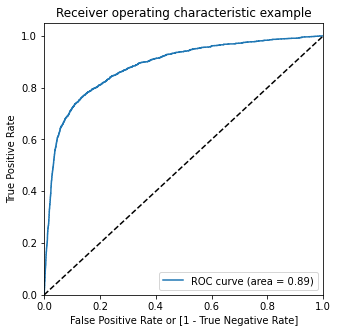

In [157]:
# Call the ROC function
draw_roc(y_train_pred_final.Churn, y_train_pred_final.Churn_Prob)

**INFERENCE: The area under the curve of the ROC is 0.89 which is quite good. We seem to have a good model. Now, let's check the sensitivity and specificity tradeoff to find the optimal cutoff point.**

### Finding Optimal Cutoff Point

In [158]:
# Let's create columns with different probability cutoffs 

numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Churn,Churn_Prob,Predicted_Churn,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,1.519132e-01,0,1,1,0,0,0,0,0,0,0,0
1,0,1.188306e-02,0,1,0,0,0,0,0,0,0,0,0
2,0,4.309068e-02,0,1,0,0,0,0,0,0,0,0,0
3,0,9.658844e-08,0,1,0,0,0,0,0,0,0,0,0
4,0,1.329280e-03,0,1,0,0,0,0,0,0,0,0,0


In [159]:
# Now let's calculate accuracy, sensitivity and specificity for various probability cutoffs.

cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)


     prob  accuracy     sensi     speci
0.0   0.0  0.080524  1.000000  0.000000
0.1   0.1  0.812619  0.800710  0.813662
0.2   0.2  0.896952  0.691898  0.914910
0.3   0.3  0.926667  0.581313  0.956911
0.4   0.4  0.928857  0.325843  0.981667
0.5   0.5  0.925667  0.154938  0.993164
0.6   0.6  0.922476  0.073329  0.996841
0.7   0.7  0.920857  0.032525  0.998653
0.8   0.8  0.920238  0.015967  0.999430
0.9   0.9  0.919952  0.007688  0.999845


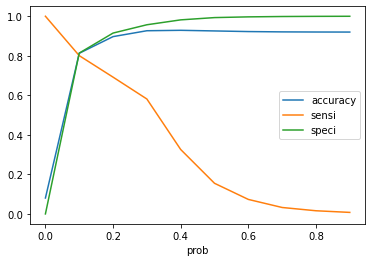

In [160]:
# Let's plot it as well
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

#### From the curve above, 0.1 seems to be the optimum point from the three metrics. So, let's take 0.1 as a cutoff probability.

In [161]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Churn_Prob.map( lambda x: 1 if x > 0.1 else 0)
y_train_pred_final.head()

,Churn,Churn_Prob,Predicted_Churn,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,1.519132e-01,0,1,1,0,0,0,0,0,0,0,0,1
1,0,1.188306e-02,0,1,0,0,0,0,0,0,0,0,0,0
2,0,4.309068e-02,0,1,0,0,0,0,0,0,0,0,0,0
3,0,9.658844e-08,0,1,0,0,0,0,0,0,0,0,0,0
4,0,1.329280e-03,0,1,0,0,0,0,0,0,0,0,0,0


In [162]:
def eval_mat_2(actual,predicted):
    # Create Confusion Matrix for train set
    con_matrix = confusion_matrix(actual.Churn,predicted.final_predicted)
    print('Confusion Matrix')
    print(con_matrix)
    print()
    
    # Let's check the overall accuracy on train set.
    accuracy = metrics.accuracy_score(actual.Churn,predicted.final_predicted)
    
    # Let's evaluate the other metrics as well
    TP = con_matrix[1,1] # true positive 
    TN = con_matrix[0,0] # true negatives
    FP = con_matrix[0,1] # false positives
    FN = con_matrix[1,0] # false negatives
    
    # Calculate the Sensitivity/Recall
    sensitivity = TP/(TP+FN)
    
    # Calculate the specificity
    specificity = TN/(TN+FP)
    
    # Calculate false postive rate - predicting churn when customer does not churn
    false_pos = FP/float(TN+FP)    
    
    # Positive predictive value 
    pos_pred = TP/float(TP+FP)
    
    # True Negative predictive value
    neg_pred = TN/float(TN+FN)

    print("Evaluation Metrics Scores after using optimal probability cutoff:")
    print("Accuracy: ",round(accuracy, 2))
    print("Sensitivity or Recall: ",round(sensitivity, 2))
    print("Specificity: ",round(specificity, 2))
    print("False Positive Rate: ",round(false_pos, 2))
    print("Positive Predictive Value: ",round(pos_pred, 2))
    print("True Negative Predictive Value: ",round(neg_pred, 2))
    
    return None

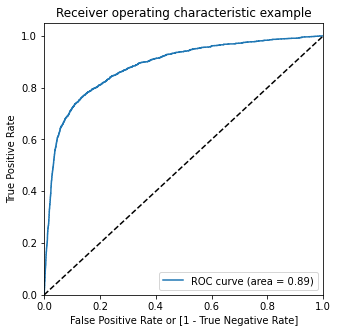

In [163]:
# Call the ROC function
draw_roc(y_train_pred_final.Churn, y_train_pred_final.Churn_Prob)

In [164]:
print("Train Data")
eval_mat_2(y_train_pred_final, y_train_pred_final)

Train Data
Confusion Matrix
[[15711  3598]
 [  337  1354]]

Evaluation Metrics Scores after using optimal probability cutoff:
Accuracy:  0.81
Sensitivity or Recall:  0.8
Specificity:  0.81
False Positive Rate:  0.19
Positive Predictive Value:  0.27
True Negative Predictive Value:  0.98


### Precision and Recall

In [165]:
#Looking at the confusion matrix again
confusion = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.final_predicted)
confusion

array([[15711,  3598],
       [  337,  1354]], dtype=int64)

#### Precision - TP/(FP+TP)

In [166]:
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.2734248788368336

#### Recall - TP/(FN+TP)

In [167]:
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.8007096392667061

### Make Predictions on the Test Set

**Let's now make predicitons on the test set.**

In [168]:
X_test[X_cols] = scaler.transform(X_test[X_cols]) #Test Data

In [169]:
X_test = X_test[final_cols]
X_test.head()

,arpu_6,onnet_mou_8,offnet_mou_8,roam_og_mou_8,std_og_mou_7,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_8,total_rech_num_8,vol_2g_mb_8,monthly_2g_8,sachet_2g_8,monthly_3g_8
20296,-0.042018,-0.491683,-0.645281,-0.192132,-0.549971,-0.571710,-0.568294,-0.191835,-0.643976,-0.337356,-0.376513,-0.416085,-0.343262
8279,-1.014833,-0.488488,-0.684073,-0.142312,-0.555140,-0.561811,-0.692112,0.031474,-0.320548,0.218667,-0.376513,0.369157,-0.343262
72269,0.333892,-0.002995,1.104758,-0.192132,-0.292931,0.551760,0.600139,-0.055576,-0.212739,-0.337356,-0.376513,-0.416085,-0.343262
65602,-0.212810,-0.257737,-0.232016,-0.192132,-0.390588,0.090788,-0.132755,-0.171736,1.404402,-0.337356,-0.376513,-0.416085,-0.343262
42758,0.096621,-0.406015,-0.680565,0.200035,0.032887,0.105151,-0.648024,-0.191835,-0.859595,-0.337356,-0.376513,-0.416085,-0.343262


In [170]:
# Make predictions on the test set and store it in the variable 'y_test_pred'
y_test_pred = res.predict(sm.add_constant(X_test))

In [171]:
y_test_pred[:10]

20296    0.241305
8279     0.123617
72269    0.003208
65602    0.034415
42758    0.489696
80210    0.000950
67925    0.030589
25034    0.028222
10422    0.002605
43140    0.063200
dtype: float64

In [172]:
# Converting y_test_pred to a dataframe
y_test_pred = pd.DataFrame(y_test_pred)

In [173]:
# Let's see the head
y_test_pred.head()

,0
20296,0.241305
8279,0.123617
72269,0.003208
65602,0.034415
42758,0.489696


In [174]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [175]:
# Remove index for both dataframes to append them side by side 
y_test_pred.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [176]:
# Append y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_test_pred],axis=1)

In [177]:
# Check 'y_pred_final'
y_pred_final.head()

,churn,0
0,1,0.241305
1,1,0.123617
2,0,0.003208
3,0,0.034415
4,1,0.489696


In [178]:
# Rename the column 
y_pred_final= y_pred_final.rename(columns = {0 : 'Churn_Prob'})
y_pred_final= y_pred_final.rename(columns = {'churn' : 'Churn'})

In [179]:
# Let's see the head of y_pred_final
y_pred_final.head()

,Churn,Churn_Prob
0,1,0.241305
1,1,0.123617
2,0,0.003208
3,0,0.034415
4,1,0.489696


In [180]:
# Make predictions on the test set using 0.1 as the cutoff
y_pred_final['final_predicted'] = y_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.1 else 0)

In [181]:
# Check y_pred_final
y_pred_final.head()

,Churn,Churn_Prob,final_predicted
0,1,0.241305,1
1,1,0.123617,1
2,0,0.003208,0
3,0,0.034415,0
4,1,0.489696,1


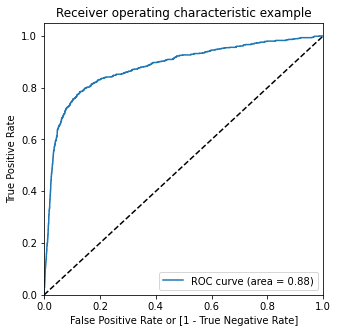

In [182]:
# Call the ROC function
draw_roc(y_pred_final.Churn, y_pred_final.Churn_Prob)

In [183]:
print("Test Data")
eval_mat_2(y_pred_final, y_pred_final)

Test Data
Confusion Matrix
[[6779 1472]
 [ 137  613]]

Evaluation Metrics Scores after using optimal probability cutoff:
Accuracy:  0.82
Sensitivity or Recall:  0.82
Specificity:  0.82
False Positive Rate:  0.18
Positive Predictive Value:  0.29
True Negative Predictive Value:  0.98


In [184]:
res.params

const              -4.340958
arpu_6              0.218116
onnet_mou_8        -0.566377
offnet_mou_8       -0.851296
roam_og_mou_8       0.183951
std_og_mou_7        0.367232
loc_ic_mou_7        0.698439
loc_ic_mou_8       -3.062041
std_ic_t2t_mou_8   -0.227341
total_rech_num_8   -0.415050
vol_2g_mb_8        -0.553975
monthly_2g_8       -0.702508
sachet_2g_8        -0.678002
monthly_3g_8       -0.666745
dtype: float64

### Summary for Logistic Regression Model
* **On Train Data Set,**
    * **AUC:  0.89**
    * **Sensitivity or Recall:  0.8**
 <br><br/>
* **On Test Data Set,**
    * **AUC:  0.88**
    * **Sensitivity or Recall:  0.82**

**INFERENCES: This model can be considered as a good model. But we can look out for other models built by using Decision Trees and Random Forest classifiers.**

In [185]:
# New 'compare' dataframe to store AUC and Recall scores of different models for comparing them later.
compare = pd.DataFrame(columns=['Model', 'AUC', 'Recall'])
compare['Model'] = ['Logistic Regression (with RFE)', 'Decision Trees', 'Random Forest']
compare.iat[0,1] = 0.88
compare.iat[0,2] = 0.82
compare

,Model,AUC,Recall
0,Logistic Regression (with RFE),0.88,0.82
1,Decision Trees,NaN,NaN
2,Random Forest,NaN,NaN


**Now let's build a Model using Decision Tree Classifier.**

## Decision Trees

In [186]:
# test train split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=100)

In [187]:
## Calculating the dimensions of train set
X_train.shape

(21000, 109)

In [188]:
# Calculating the dimensions of test set
X_test.shape

(9001, 109)

In [189]:
from sklearn.tree import DecisionTreeClassifier

In [190]:
### - Building Decision tree model.
### - Using Class Weight to handle Class Imbalance

In [191]:
dt_base = DecisionTreeClassifier(random_state=100, max_depth=3, class_weight='balanced')

In [192]:
dt_base.fit(X_train, y_train) # fitting the model

DecisionTreeClassifier(class_weight='balanced', max_depth=3, random_state=100)

In [193]:
# Making predictions on test and train set
y_train_pred = dt_base.predict(X_train) 
y_test_pred = dt_base.predict(X_test)

In [194]:
from sklearn.metrics import classification_report

In [195]:
#Printing the report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.98      0.90      0.93      8251
           1       0.40      0.76      0.52       750

    accuracy                           0.89      9001
   macro avg       0.69      0.83      0.73      9001
weighted avg       0.93      0.89      0.90      9001



In [196]:
from sklearn.metrics import plot_roc_curve

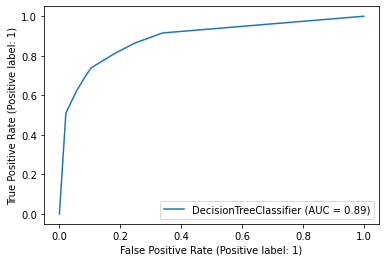

In [197]:
# Plotting ROC for train set
plot_roc_curve(dt_base, X_train, y_train, drop_intermediate=False)
plt.show()

In [198]:
# AUC for train set
y_train_score = dt_base.predict_proba(X_train)[:, 1]
auc_train = roc_auc_score(y_train, y_train_score)
print("AUC (for Train set): ",round(auc_train, 2))

AUC (for Train set):  0.89


In [199]:
#printing confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

[[7403  848]
 [ 183  567]]


In [200]:
# Let's evaluate the other metrics as well
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [201]:
# Let's check the overall accuracy on test set.
accuracy_test = metrics.accuracy_score(y_test, y_test_pred)

In [202]:
# Calculate the Sensitivity/Recall
sensitivity_test = TP/(TP+FN)

# Calculate the specificity
specificity_test = TN/(TN+FP)

# Calculate false postive rate - predicting churn when customer does not churn
false_pos_test=FP/float(TN+FP)

# Positive predictive value 
pos_pred_test=TP/float(TP+FP)

# True Negative predictive value
neg_pred_test=TN/float(TN+FN)

print("Evaluation Metrics Scores for Test Data")
print("Accuracy: ",round(accuracy_test, 2))
print("Sensitivity or Recall: ",round(sensitivity_test, 2))
print("Specificity: ",round(specificity_test, 2))
print("False Positive Rate: ",round(false_pos_test, 2))
print("Positive Predictive Value: ",round(pos_pred_test, 2))
print("True Negative Predictive Value: ",round(neg_pred_test, 2))

Evaluation Metrics Scores for Test Data
Accuracy:  0.89
Sensitivity or Recall:  0.76
Specificity:  0.9
False Positive Rate:  0.1
Positive Predictive Value:  0.4
True Negative Predictive Value:  0.98


In [203]:
#printing AUC value for test set
y_test_score = dt_base.predict_proba(X_test)[:, 1]
auc_test = roc_auc_score(y_test, y_test_score)
print("AUC (for test set): ",round(auc_test, 2))

AUC (for test set):  0.89


### Hyper-parameter Tuning for the Decision Tree

In [204]:
from sklearn.model_selection import GridSearchCV

In [205]:
# Buliding Decision tree model using class weight to handle data imbalance
dt = DecisionTreeClassifier(random_state=100, class_weight='balanced')

In [206]:
params = {
    "max_depth": [5,8,10,12,15],
    "min_samples_leaf": [5,10,20,30,50]
}

In [207]:
grid_search = GridSearchCV(estimator=dt,
                           param_grid=params,
                           cv=5,
                           n_jobs=-1, verbose=1, scoring="recall")

In [208]:
%%time
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
Wall time: 20 s


GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(class_weight='balanced',
                                              random_state=100),
             n_jobs=-1,
             param_grid={'max_depth': [5, 8, 10, 12, 15],
                         'min_samples_leaf': [5, 10, 20, 30, 50]},
             scoring='recall', verbose=1)

In [209]:
grid_search.best_score_

0.800722626590564

In [210]:
dt_best = grid_search.best_estimator_
dt_best

DecisionTreeClassifier(class_weight='balanced', max_depth=5,
                       min_samples_leaf=20, random_state=100)

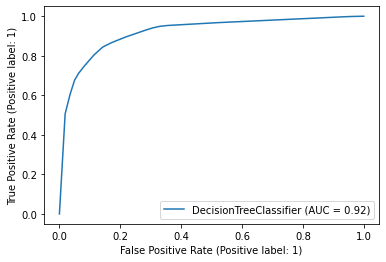

In [211]:
#Plotting ROC curve
plot_roc_curve(dt_best, X_train, y_train)
plt.show()

In [212]:
# AUC value for train set
y_train_score = dt_best.predict_proba(X_train)[:, 1]
auc_train = roc_auc_score(y_train, y_train_score)
print("AUC (for training set): ",round(auc_train, 2))

AUC (for training set):  0.92


In [213]:
#making predictions on test and train set
y_train_pred = dt_best.predict(X_train)
y_test_pred = dt_best.predict(X_test)

In [214]:
#printing all the scores
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.98      0.86      0.92      8251
           1       0.34      0.83      0.49       750

    accuracy                           0.85      9001
   macro avg       0.66      0.84      0.70      9001
weighted avg       0.93      0.85      0.88      9001



In [215]:
#Printint the confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

[[7074 1177]
 [ 131  619]]


In [216]:
# Let's check the overall accuracy on test set.
accuracy_test = metrics.accuracy_score(y_test, y_test_pred)

In [217]:
# Let's evaluate the other metrics as well
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [218]:
# Calculate the Sensitivity/Recall
sensitivity_test = TP/(TP+FN)

In [219]:
# Calculate the specificity
specificity_test = TN/(TN+FP)

In [220]:
# Calculate false postive rate - predicting churn when customer does not churn
false_pos_test=FP/float(TN+FP)

In [221]:
# Positive predictive value 
pos_pred_test=TP/float(TP+FP)

In [222]:
# True Negative predictive value
neg_pred_test=TN/float(TN+FN)

In [223]:
print("Evaluation Metrics Scores for Test Data (After Hyperparameter Tuning)")
print("Accuracy: ",round(accuracy_test, 2))
print("Sensitivity or Recall: ",round(sensitivity_test, 2))
print("Specificity: ",round(specificity_test, 2))
print("False Positive Rate: ",round(false_pos_test, 2))
print("Positive Predictive Value: ",round(pos_pred_test, 2))
print("True Negative Predictive Value: ",round(neg_pred_test, 2))

Evaluation Metrics Scores for Test Data (After Hyperparameter Tuning)
Accuracy:  0.85
Sensitivity or Recall:  0.83
Specificity:  0.86
False Positive Rate:  0.14
Positive Predictive Value:  0.34
True Negative Predictive Value:  0.98


In [224]:
y_test_score = dt_best.predict_proba(X_test)[:, 1]
auc_test = roc_auc_score(y_test, y_test_score)
print("AUC (for test set): ",round(auc_test, 2))

AUC (for test set):  0.9


In [225]:
imp_features_df = pd.DataFrame({
    "Feature": X_train.columns,
    "Importance": dt_best.feature_importances_
})

In [226]:
imp_features_df.sort_values(by="Importance", ascending=False, inplace=True)

In [227]:
imp_features_df.head(15)

,Feature,Importance
53,loc_ic_mou_8,0.665268
104,total_monthly_rech_8,0.099362
14,roam_og_mou_8,0.086317
35,std_og_mou_7,0.029433
11,roam_ic_mou_8,0.019995
1,arpu_7,0.016796
10,roam_ic_mou_7,0.014190
83,vol_2g_mb_8,0.013717
80,max_rech_data_8,0.012264
65,spl_ic_mou_8,0.006398


In [228]:
# Update compare dataframe to store AUC and Recall scores of Decision Tree Model, for comparing it later.
compare.iat[1,1] = 0.9
compare.iat[1,2] = 0.83
compare

,Model,AUC,Recall
0,Logistic Regression (with RFE),0.88,0.82
1,Decision Trees,0.9,0.83
2,Random Forest,NaN,NaN


### Summary for Decision Trees
#### Before Hyper-Parameter Tuning
* **AUC of Train set: 0.89**
<br><br/>
* **Recall of Test set: 0.76**
* **AUC of Test set: 0.89**
    
#### After Hyper-Parameter Tuning
* **AUC of Train set: 0.92**
<br><br/>
* **Recall of Test set: 0.83**
* **AUC of Test set: 0.9**
<br><br/>

**INFERENCE: The performance of the Decision Tree Model has increased after Hyper-Parameter Tuning. This model is better than Logistic Regression Model when AUC and Recall scores are compared.**<br><br/>
**Now let's build a Model using Random Forest Classifier.**

## Random Forest

In [229]:
#Test Train split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=100)

In [230]:
# # Calculating the dimensions of train set
X_train.shape

(21000, 109)

In [231]:
## Calculating the dimensions of test set
X_test.shape

(9001, 109)

In [232]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold,GridSearchCV
from sklearn import metrics
from sklearn.metrics import recall_score, accuracy_score, confusion_matrix, f1_score,classification_report
from sklearn.metrics import precision_score, auc, roc_auc_score, roc_curve, precision_recall_curve,plot_roc_curve

#### Building Random Forest Model without tuning Hyperparameters
#### Handling Class Imbalance using 'class weight'

In [233]:
# Building model without any hyper parameter tuning
classifier_rf= RandomForestClassifier(n_estimators=10, max_depth=4, max_features=5, random_state=100, oob_score=True, class_weight= 'balanced')

In [234]:
# fitting the model
classifier_rf.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=4, max_features=5,
                       n_estimators=10, oob_score=True, random_state=100)

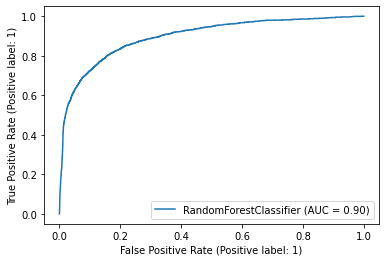

In [235]:
#Plotting the ROC curve
plot_roc_curve(classifier_rf, X_train, y_train)
plt.show()

In [236]:
y_train_score = classifier_rf.predict_proba(X_train)[:, 1]
auc_train = roc_auc_score(y_train, y_train_score)
print("AUC (for training set): ",round(auc_train, 2))

AUC (for training set):  0.9


#### The AUC value looks good enough from the above plot, let's make predictions on train data set to assess model performance

In [237]:
# Making predictions on train set

# Checking the performance of the train dataset
predictions = classifier_rf.predict(X_train)
print("Evaluation on training data set: \n")
print(classification_report(y_train,predictions))

Evaluation on training data set: 

              precision    recall  f1-score   support

           0       0.97      0.92      0.94     19309
           1       0.42      0.70      0.53      1691

    accuracy                           0.90     21000
   macro avg       0.70      0.81      0.74     21000
weighted avg       0.93      0.90      0.91     21000



In [238]:
# Printing confusion matrix
conf = confusion_matrix(y_train, predictions)
print(conf)

[[17710  1599]
 [  510  1181]]


In [239]:
# Calculating the value of true positive
TP = conf[1,1]
# Calculating the value of true negatives
TN = conf[0,0]
# Calculating the value of false positives
FP = conf[0,1] 
# Calculating the value of false negatives
FN = conf[1,0]

In [240]:
# Calculating the sensitivity/recall
recall_val=round(TP/(TP+FN),2)

# Calculating the specificity/precision
precision_val=round(TN/(TN+FP),2)

print("Recall of Train set:" ,recall_val)
print("Precision of Train set:" ,precision_val)

Recall of Train set: 0.7
Precision of Train set: 0.92


### Prediction on Test Data

In [241]:
# Checking the performance on the test dataset
y_test_pr = classifier_rf.predict(X_test)

print("Evaluation on test data set: \n")

print(classification_report(y_test,y_test_pr))

Evaluation on test data set: 

              precision    recall  f1-score   support

           0       0.97      0.92      0.94      8251
           1       0.44      0.70      0.54       750

    accuracy                           0.90      9001
   macro avg       0.71      0.81      0.74      9001
weighted avg       0.93      0.90      0.91      9001



In [242]:
# Printing confusion matrix
conf = confusion_matrix(y_test, y_test_pr)
print(conf)

[[7586  665]
 [ 227  523]]


In [243]:
# Calculating the value of true positive
TP = conf[1,1]
# Calculating the value of true negatives
TN = conf[0,0]
# Calculating the value of false positives
FP = conf[0,1] 
# Calculating the value of false negatives
FN = conf[1,0]

In [244]:
# Calculating the sensitivity/recall
recall_val=round(TP/(TP+FN),2)

# Calculating the specificity/precision
precision_val=round(TN/(TN+FP),2)

print("Recall of the test set:" ,recall_val)
print("Precision of the test set:" ,precision_val)

Recall of the test set: 0.7
Precision of the test set: 0.92


In [245]:
#printing the AUC value for test set
y_test_score = classifier_rf.predict_proba(X_test)[:, 1]
auc_test = roc_auc_score(y_test, y_test_score)
print("AUC (for test set): ",round(auc_test, 2))

AUC (for test set):  0.89


### Let us tune the hyperparameters and observe if the model performance improves

In [246]:
### Let's now tune hypermeters and check the model performance, so that we can improve it.
rf = RandomForestClassifier(random_state=42, n_jobs=-1, class_weight= 'balanced')

In [247]:
params = {
    'max_depth': [2,3,5,10,20],
    'min_samples_leaf': [5,10,20,50,100,200],
    'n_estimators': [10, 25, 50, 100]
}

In [248]:
grid_search = GridSearchCV(estimator=rf,
                           param_grid=params,
                           cv = 4,
                           n_jobs=-1, verbose=1, scoring="recall")

In [249]:
%%time
grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 120 candidates, totalling 480 fits
Wall time: 1min 36s


GridSearchCV(cv=4,
             estimator=RandomForestClassifier(class_weight='balanced',
                                              n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100, 200],
                         'n_estimators': [10, 25, 50, 100]},
             scoring='recall', verbose=1)

In [250]:
grid_search.best_score_

0.7675820420602109

In [251]:
rf_best = grid_search.best_estimator_
rf_best

RandomForestClassifier(class_weight='balanced', max_depth=20,
                       min_samples_leaf=200, n_estimators=10, n_jobs=-1,
                       random_state=42)

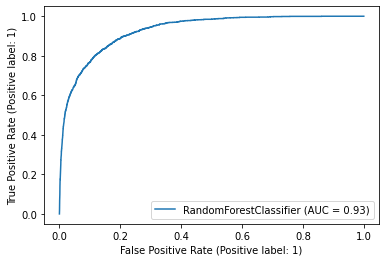

In [252]:
#Plotting ROC curve
plot_roc_curve(rf_best, X_train, y_train)
plt.show()

In [253]:
# Calculating the AUC value for train set
y_train_score = rf_best.predict_proba(X_train)[:, 1]
auc_train = roc_auc_score(y_train, y_train_score)
print("AUC (for training set): ",round(auc_train, 2))

AUC (for training set):  0.93


In [254]:
# making predictions on test and train set
y_train_pred = rf_best.predict(X_train)
y_test_pred = rf_best.predict(X_test)

# Print the report
print("--------------------Predictions on train set:---------------------")
print(metrics.classification_report(y_train, y_train_pred))
print("--------------------Predictions on test set:---------------------")
print(metrics.classification_report(y_test, y_test_pred))

--------------------Predictions on train set:---------------------
              precision    recall  f1-score   support

           0       0.98      0.88      0.93     19309
           1       0.36      0.81      0.50      1691

    accuracy                           0.87     21000
   macro avg       0.67      0.84      0.71     21000
weighted avg       0.93      0.87      0.89     21000

--------------------Predictions on test set:---------------------
              precision    recall  f1-score   support

           0       0.98      0.88      0.92      8251
           1       0.37      0.80      0.51       750

    accuracy                           0.87      9001
   macro avg       0.67      0.84      0.72      9001
weighted avg       0.93      0.87      0.89      9001



In [255]:
# Printing confusion matrix
conf = confusion_matrix(y_train, y_train_pred)
print(conf)


# Calculating the value of true positive
TP = conf[1,1]
# Calculating the value of true negatives
TN = conf[0,0]
# Calculating the value of false positives
FP = conf[0,1] 
# Calculating the value of false negatives
FN = conf[1,0]


# Calculating the sensitivity/recall
recall_val=round(TP/(TP+FN),2)

# Calculating the specificity/precision
precision_val=round(TN/(TN+FP),2)

print("Recall Value of Train set:" ,recall_val)
print("Precision of Train set:" ,precision_val)

[[16918  2391]
 [  322  1369]]
Recall Value of Train set: 0.81
Precision of Train set: 0.88


In [256]:
# Printing confusion matrix
conf = confusion_matrix(y_test, y_test_pred)
print(conf)

[[7227 1024]
 [ 149  601]]


In [257]:
# Calculating the value of true positive
TP = conf[1,1]
# Calculating the value of true negatives
TN = conf[0,0]
# Calculating the value of false positives
FP = conf[0,1] 
# Calculating the value of false negatives
FN = conf[1,0]

In [258]:
# Calculating the sensitivity/recall
recall_val=round(TP/(TP+FN),2)

# Calculating the specificity/precision
precision_val=round(TN/(TN+FP),2)

print("Recall of Test Set:" ,recall_val)
print("Precision of Test Set:" ,precision_val)

Recall of Test Set: 0.8
Precision of Test Set: 0.88


In [259]:
#Calculating AUC value
y_test_score = rf_best.predict_proba(X_test)[:, 1]
auc_test = roc_auc_score(y_test, y_test_score)
print("AUC (for test set): ",round(auc_test, 2))

AUC (for test set):  0.91


#### Identifying Best Features

In [260]:
rf_best.feature_importances_

array([3.70709654e-03, 5.49683588e-03, 1.35503502e-02, 1.95941706e-03,
       2.53499127e-03, 3.11209514e-03, 4.25339043e-04, 3.63317713e-03,
       9.55369829e-03, 0.00000000e+00, 6.16978077e-04, 3.24230986e-02,
       0.00000000e+00, 8.81269634e-04, 6.00059971e-02, 1.94856848e-03,
       2.55125432e-03, 5.33922028e-03, 4.91460244e-03, 3.46509711e-03,
       8.50819250e-02, 2.94713092e-05, 3.89588201e-04, 5.44351152e-02,
       0.00000000e+00, 7.04175752e-04, 3.43000399e-04, 9.66933289e-04,
       4.23624798e-03, 1.65576866e-01, 1.60770330e-04, 1.58709349e-04,
       3.19806203e-04, 0.00000000e+00, 4.10735660e-03, 9.38431707e-03,
       7.83392740e-04, 0.00000000e+00, 7.87287957e-04, 3.59938198e-03,
       2.41935759e-02, 3.74700273e-05, 0.00000000e+00, 0.00000000e+00,
       4.64377839e-03, 5.27868717e-03, 1.75685010e-03, 2.16914594e-02,
       8.37534995e-04, 1.48267864e-04, 4.38494884e-03, 7.72653290e-04,
       6.29294391e-03, 1.45411702e-01, 4.52487313e-05, 1.52477117e-03,
      

In [261]:
df_impf = pd.DataFrame({
    "Varname": X_train.columns,
    "Imp": rf_best.feature_importances_
})

#### The Important 15 features are listed below in descending order

In [262]:
df_impf.sort_values(by="Imp", ascending=False).head(15)

,Varname,Imp
29,loc_og_mou_8,0.165577
53,loc_ic_mou_8,0.145412
104,total_monthly_rech_8,0.127070
20,loc_og_t2m_mou_8,0.085082
14,roam_og_mou_8,0.060006
23,loc_og_t2f_mou_8,0.054435
83,vol_2g_mb_8,0.042187
80,max_rech_data_8,0.038967
62,std_ic_mou_8,0.035756
11,roam_ic_mou_8,0.032423


### Summary of Random Forest Model:
#### Before Hyper-Parameter Tuning
* **Recall of Train set: 0.7**
* **AUC of Train set: 0.9**
<br><br/>
* **Recall of Test set: 0.7**
* **AUC of Test set: 0.89**
    
#### After Hyper-Parameter Tuning
* **Recall of Train set: 0.81**
* **AUC of Train set: 0.93**
<br><br/>
* **Recall of Test set: 0.8**
* **AUC of Test set: 0.91**

**INFERENCE: The performance of the Random Forest Model has increased after Hyper-Parameter Tuning. This model is also better than the Logistic Regression Model when their AUC and Recall scores are compared.**

## Best Model 

In [263]:
# Update compare dataframe to store AUC and Recall scores of Random Forest Model, for comparing it later.
compare.iat[2,1] = 0.91
compare.iat[2,2] = 0.8
compare

,Model,AUC,Recall
0,Logistic Regression (with RFE),0.88,0.82
1,Decision Trees,0.9,0.83
2,Random Forest,0.91,0.8


* **Comparing the AUC scores of all the three models, it seems that the Random Forest is the best. But as it is more important to accurately identify the churners than the non-churners, we will give more importance to the Recall score in this case.**
* **Recall is the measure of the model correctly identifying True Positives (i.e. the actual churners in this case).**

### Therefore, the Decision Tree Model is the best out of these models when Recall evaluation metric is considered.

In [264]:
# test-train split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=100)

In [265]:
# Calculating the dimensions of train set
X_train.shape

(21000, 109)

In [266]:
# Calculating the dimensions of test set
X_test.shape

(9001, 109)

##### Model Building using decision tree while handline Class Imbalance using 'Class Weight'.

In [267]:
#Model Building using Decision tree
final_model = DecisionTreeClassifier(class_weight='balanced', max_depth=5,
                       min_samples_leaf=20, random_state=100)

In [268]:
#fitting the model
final_model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=5,
                       min_samples_leaf=20, random_state=100)

In [269]:
#Making predictions on test and train set
y_train_pred = final_model.predict(X_train)
y_test_pred = final_model.predict(X_test)

In [270]:
# printing all the scores
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.98      0.86      0.92      8251
           1       0.34      0.83      0.49       750

    accuracy                           0.85      9001
   macro avg       0.66      0.84      0.70      9001
weighted avg       0.93      0.85      0.88      9001



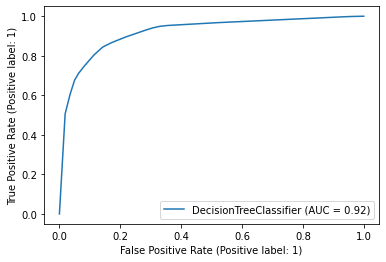

In [271]:
#Plotting ROC curve
plot_roc_curve(final_model, X_train, y_train)
plt.show()

In [272]:
# Calculating AUC value
y_train_score = final_model.predict_proba(X_train)[:, 1]
auc_train = roc_auc_score(y_train, y_train_score)
print("AUC (for Train set): ",round(auc_train, 2))

AUC (for Train set):  0.92


In [273]:
# Printing the confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

[[7074 1177]
 [ 131  619]]


In [274]:
# Let's evaluate the other metrics as well
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [275]:
# Let's check the overall accuracy on test set.
accuracy_test = metrics.accuracy_score(y_test, y_test_pred)

# Calculate the Sensitivity/Recall
sensitivity_test = TP/(TP+FN)

# Calculate the specificity
specificity_test = TN/(TN+FP)

# Calculate false postive rate - predicting churn when customer does not churn
false_pos_test=FP/float(TN+FP)

# Positive predictive value 
pos_pred_test=TP/float(TP+FP)

# True Negative predictive value
neg_pred_test=TN/float(TN+FN)

print("Evaluation Metrics Scores for Test Data")
print("Accuracy: ",round(accuracy_test, 2))
print("Sensitivity or Recall: ",round(sensitivity_test, 2))
print("Specificity: ",round(specificity_test, 2))
print("False Positive Rate: ",round(false_pos_test, 2))
print("Positive Predictive Value: ",round(pos_pred_test, 2))
print("True Negative Predictive Value: ",round(neg_pred_test, 2))

Evaluation Metrics Scores for Test Data
Accuracy:  0.85
Sensitivity or Recall:  0.83
Specificity:  0.86
False Positive Rate:  0.14
Positive Predictive Value:  0.34
True Negative Predictive Value:  0.98


In [276]:
#Printing the AUC value
y_test_score = final_model.predict_proba(X_test)[:, 1]
auc_test = roc_auc_score(y_test, y_test_score)
print("AUC (for Train set): ",round(auc_test, 2))

AUC (for Train set):  0.9


In [277]:
# Finding the important features
imp_features_df = pd.DataFrame({
    "Feature": X_train.columns,
    "Importance": final_model.feature_importances_
})

In [278]:
#Sorting the importing features in descending order
imp_features_df.sort_values(by="Importance", ascending=False, inplace=True)

### Displaying the topmost important  features

In [279]:
#Displaying top 30 values
imp_features_df.head(30)

,Feature,Importance
53,loc_ic_mou_8,0.665268
104,total_monthly_rech_8,0.099362
14,roam_og_mou_8,0.086317
35,std_og_mou_7,0.029433
11,roam_ic_mou_8,0.019995
1,arpu_7,0.016796
10,roam_ic_mou_7,0.014190
83,vol_2g_mb_8,0.013717
80,max_rech_data_8,0.012264
65,spl_ic_mou_8,0.006398


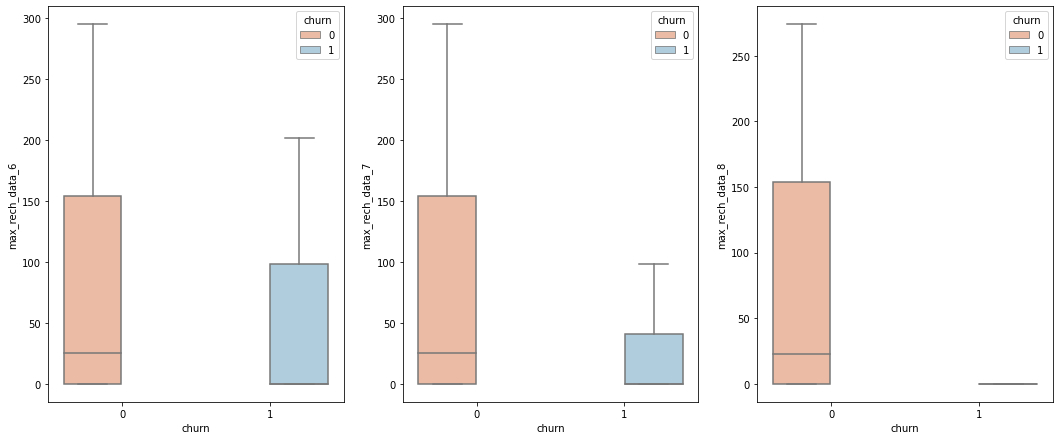

In [280]:
# Box plot for max_rech_data Vs churn
plt_box_chart('max_rech_data')

### Inference:
**As shown in the above plot, the customers who are not renewing their 'Mobile Internet' in the '8th month' are highly likely to churn while non- churners renew their mobile internet every month.**

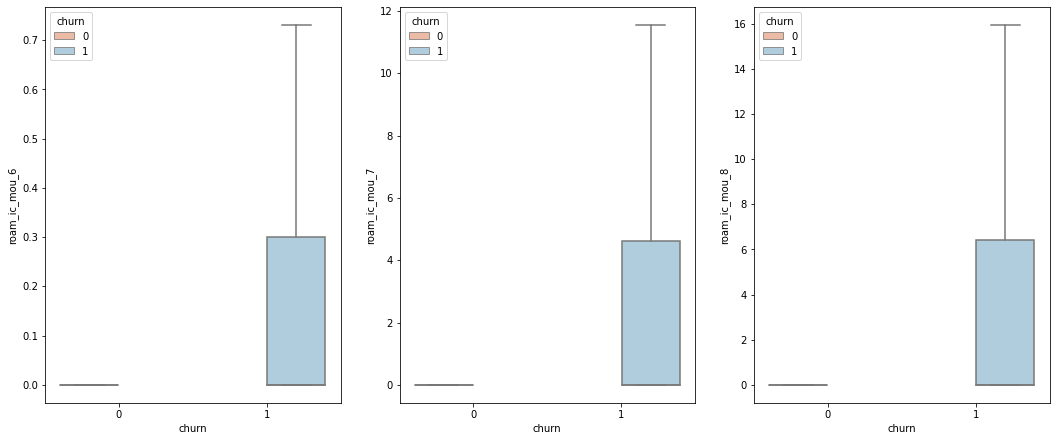

In [281]:
# Box plot for roam_ic_mou Vs churn
plt_box_chart('roam_ic_mou')

### Inference:
**As shown in the above plot, churners are using roaming facilities more when compared to non-churners. Hence, the service provider should focus on improving the roaming services.**

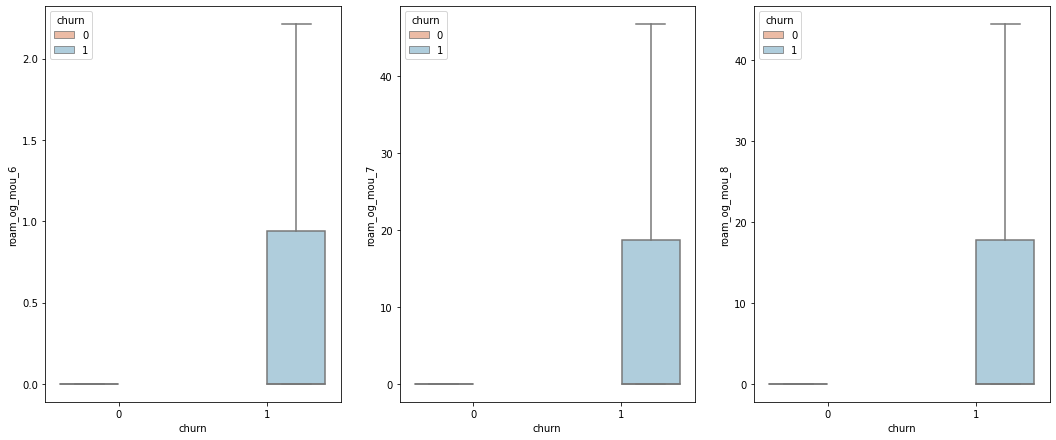

In [282]:
## Box PLot for roam_og_mou Vs Churn
plt_box_chart('roam_og_mou')

### Inference:

**As shown in the above plot, churners are using roaming facilities more when compared to non-churners. Hence, the service provider should focus on improving the roaming services.**

## Model Recommendations

* **Best Model: Decision Tree**


* **Evaluation Metric used: Recall**
<br><br/>
* **Comparing the AUC scores of all the three models, it seems that the Random Forest is the best. But as it is more important to accurately identify the churners than the non-churners, we will give more importance to the Recall score in this case. Recall is the measure of the model correctly identifying True Positives (i.e. the actual churners in this case).**
<br><br/>


## Important predictors for identifying Churners

In [283]:
imp_features_df.head(10)

,Feature,Importance
53,loc_ic_mou_8,0.665268
104,total_monthly_rech_8,0.099362
14,roam_og_mou_8,0.086317
35,std_og_mou_7,0.029433
11,roam_ic_mou_8,0.019995
1,arpu_7,0.016796
10,roam_ic_mou_7,0.014190
83,vol_2g_mb_8,0.013717
80,max_rech_data_8,0.012264
65,spl_ic_mou_8,0.006398


#### The important parameters to predict a churn based on month 8 data
- **Local incoming calls within same operator**
- **Total Monthly Recharge Amount**
- **Roaming Outgoing calls**
- **Roaming Incoing calls**
- **Maximum Mobile Recharge Data**

## Conclusions

- **Churn rate is maximum in first 6 months and least if customer is using the network for more than 5 years.**
- **Total monthly recharge is least in the 8th month. This indicates that the monthly recharge gradually decreases for the potential churners and they make the least recharges in 8th month.**
- **The Average Revenue Per User (ARPU) for 8th month is the least when compared to 6th, 7th months. This indicates that the customers who generate the least revenue in the 8th month are highly likely to churn.**
- **Local outgoing calls for the 8th month is the lowest for the customers who churn. Therefore, customers who make the least local calls in the 8th month are highly likely to churn.**
- **Churners are using roaming facilities more when compared to non-churners.** 
- **The customers who are not renewing their 'Mobile Internet' in the '8th month' are highly likely to churn while non-churners renew their mobile internet every month.**


## Recommendations and Strategies

- **Customer Acquisition is more costly than Customer Retention. Therefore, the focus should be on retaining the current customers.**

- **Average Revenue Per User (ARPU) is one the most important feature in determining churn prediction. So, the Telecom company should focus more on 'Average Revenue Per Customer' feature, especially in the 7th and 8th Month.**

- **Churners have been using roaming facilities more when compared to non-churners. Hence, the service provider should focus on improving the quality roaming services. The company should reconsider the roaming charges, provide discounts or special roaming service offers in order to retain customers.**

- **Churn rate is observed to be maximum within the first 6 months of customers using the network service. Therefore, the company should focus more on these existing new customers and provide special schemes to them in order to increase the retention rate.**

- **The Telecom company should restructure the STD outgoing call charges as they may be high. Or additional benefits can be given in the current rate.**

- **Special offers or additional benefits should be provided on Monthly Recharge packs to retain the customers.**
